In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
data = pd.read_csv(r"Housing-project-train-data.csv")
data_backup = data.copy()
#here i created a backup of dataset

In [5]:
data.shape

(1168, 81)

In [397]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
print(data.sort_values(by="Id", ascending=True).head(10), "\n", data.columns)

      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
427    1          60       RL         65.0     8450   Pave   NaN      Reg   
146    2          20       RL         80.0     9600   Pave   NaN      Reg   
102    3          60       RL         68.0    11250   Pave   NaN      IR1   
143    4          70       RL         60.0     9550   Pave   NaN      IR1   
280    5          60       RL         84.0    14260   Pave   NaN      IR1   
291    7          20       RL         75.0    10084   Pave   NaN      Reg   
1090   8          60       RL          NaN    10382   Pave   NaN      IR1   
363   10         190       RL         50.0     7420   Pave   NaN      Reg   
193   12          60       RL         85.0    11924   Pave   NaN      IR1   
416   13          20       RL          NaN    12968   Pave   NaN      IR2   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
427          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
146 

In [398]:
#so here SalePrice is the target variable
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [399]:
#only_num_data = data.select_dtypes(include=["float64", "int64"])
#only_num_data.head(10)
data.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   127         120       RL          NaN     4928   Pave   NaN      IR1   
1   889          20       RL         95.0    15865   Pave   NaN      IR1   
2   793          60       RL         92.0     9920   Pave   NaN      IR1   
3   110          20       RL        105.0    11751   Pave   NaN      IR1   
4   422          20       RL          NaN    16635   Pave   NaN      IR1   
5  1197          60       RL         58.0    14054   Pave   NaN      IR1   
6   561          20       RL          NaN    11341   Pave   NaN      IR1   
7  1041          20       RL         88.0    13125   Pave   NaN      Reg   
8   503          20       RL         70.0     9170   Pave   NaN      Reg   
9   576          50       RL         80.0     8480   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
5         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
6         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
7         Lvl    AllPub    Corner       Gtl       Sawyer       Norm   
8         Lvl    AllPub    Corner       Gtl      Edwards      Feedr   
9         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   
5       Norm     1Fam     2Story            7            5       2006   
6       Norm     1Fam     1Story            5            6       1957   
7       Norm     1Fam     1Story            5            4       1957   
8       Norm     1Fam     1Story            5            7       1965   
9       Norm     1Fam     1.5Fin            5            5       1947   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood        NaN   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng        NaN   
2          1997     Gable  CompShg     MetalSd     MetalSd        NaN   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   
5          2006     Gable  CompShg     VinylSd     VinylSd        NaN   
6          1996       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
7          2000     Gable  CompShg     Wd Sdng     Wd Sdng     BrkCmn   
8          1965       Hip  CompShg     MetalSd     MetalSd        NaN   
9          1950     Gable  CompShg     MetalSd     MetalSd        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   
5         0.0        Gd        TA      PConc       Gd       TA           Av   
6       180.0        TA        TA     CBlock       Gd       TA           No   
7        67.0        TA        TA     CBlock       TA       TA           No   
8         0.0        TA        TA     CBlock       TA       TA     

numerical columns:
LotFrontage
LotArea
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
Bedrooms
Kitchens
TotRmsAbvGrd
Fireplace
GarageYrBlt
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorchSF
35snPorch
PoolArea
GarageCars
MiscVal
MoSold
YrSold
*SalePrice

categorical columns:
Id
MSSubClass
MSZoning
Street
Alley
LotShape
LandCountour
Utilities
LotConfig
LandSlope
Neighbourhood
Condition1
Condition2
Condition3
BldgType
HouseStyle
OverallQual
OverallCond
RoofStyle
RoofMat1
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BasmtExposure
BsmtFinType1
BsmtType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [400]:
print(data.isnull().sum())   #column wise nulls
print(data.isnull().sum().sum())  #total nulls
print(data.shape)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        703
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [401]:
data.sample(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
977    731         120       RL         39.0     5389   Pave   NaN      IR1   
912    871          20       RL         60.0     6600   Pave   NaN      Reg   
262     96          60       RL          NaN     9765   Pave   NaN      IR2   
176    194         160       RM         24.0     2522   Pave   NaN      Reg   
502    276          50       RL         55.0     7264   Pave   NaN      Reg   
168     70          50       RL         81.0    15593   Pave   NaN      Reg   
1102  1063         190       RM         85.0    13600   Pave  Grvl      Reg   
966    986         190       RL         68.0    10880   Pave   NaN      Reg   
992    666          60       RL        106.0    11194   Pave   NaN      IR1   
765   1283          20       RL         61.0     8800   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
977          Lvl    AllPub    Inside       Gtl      StoneBr       Norm   
912          Lvl    AllPub    Inside       Gtl        NAmes       PosN   
262          Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
176          Lvl    AllPub    Inside       Gtl      Edwards       Norm   
502          Lvl    AllPub    Inside       Gtl      BrkSide       Norm   
168          Lvl    AllPub    Corner       Gtl      ClearCr       Norm   
1102         Lvl    AllPub    Inside       Gtl      OldTown       Norm   
966          Lvl    AllPub    Inside       Gtl      Edwards       Norm   
992          Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
765          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
977        Norm   TwnhsE     1Story            8            5       1995   
912        Norm     1Fam     1Story            5            5       1962   
262        Norm     1Fam     2Story            6            8       1993   
176        Norm    Twnhs     2Story            7            5       2004   
502        Norm     1Fam     1.5Fin            7            7       1925   
168        Norm     1Fam     1.5Fin            7            4       1953   
1102       Norm   2fmCon     2Story            5            5       1900   
966        Norm   2fmCon     1Story            5            5       1950   
992        Norm     1Fam     2Story            8            5       2000   
765        Norm     1Fam     1Story            5            7       1977   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
977           1996     Gable  CompShg     CemntBd     CmentBd        NaN   
912           1962       Hip  CompShg     MetalSd     MetalSd        NaN   
262           1993     Gable  CompShg     VinylSd     VinylSd    BrkFace   
176           2004     Gable  CompShg     VinylSd     VinylSd      Stone   
502           2007     Gable  CompShg     Wd Sdng     Wd Sdng        NaN   
168           1953     Gable  CompShg     BrkFace     AsbShng        NaN   
1102          1950     Gable  CompShg     Wd Sdng     Wd Sdng        NaN   
966           1950     Gable  CompShg     MetalSd     MetalSd        NaN   
992           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
765           2008     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
977          0.0        Gd        TA      PConc       Gd       TA   
912          0.0        TA        TA     CBlock       TA       TA   
262         68.0        Ex        Gd      PConc       Gd       Gd   
176         50.0        Gd        TA      PConc       Gd       TA   
502          0.0        Gd        Gd     BrkTil       TA       TA   
168          0.0        Gd        TA     CBlock       TA       TA   
1102         0.0        TA        TA     BrkTil       TA       TA   
966          0.0        TA        TA     CBlock       TA       TA   
992         40.0        Gd  

In [402]:
data.drop(columns=["Id"], inplace=True)

In [403]:
data.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000    954.00000    1168.000000  1168.000000  1168.000000   
mean     56.767979     70.98847   10484.749144     6.104452     5.595890   
std      41.940650     24.82875    8957.442311     1.390153     1.124343   
min      20.000000     21.00000    1300.000000     1.000000     1.000000   
25%      20.000000     60.00000    7621.500000     5.000000     5.000000   
50%      50.000000     70.00000    9522.500000     6.000000     5.000000   
75%      70.000000     80.00000   11515.500000     7.000000     6.000000   
max     190.000000    313.00000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1168.000000   1168.000000  1161.000000  1168.000000  1168.000000   
mean   1970.930651   1984.758562   102.310078   444.726027    46.647260   
std      30.145255     20.785185   182.595606   462.664785   163.520016   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000   
50%    1972.000000   1993.000000     0.000000   385.500000     0.000000   
75%    2000.000000   2004.000000   160.000000   714.500000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean    569.721747  1061.095034  1169.860445   348.826199      6.380137   
std     449.375525   442.272249   391.161983   439.696370     50.892844   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     216.000000   799.000000   892.000000     0.000000      0.000000   
50%     474.000000  1005.500000  1096.500000     0.000000      0.000000   
75%     816.000000  1291.500000  1392.000000   729.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean   1525.066781      0.425514      0.055651     1.562500     0.388699   
std     528.042957      0.521615      0.236699     0.551882     0.504929   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1143.250000      0.000000      0.000000     1.000000     0.000000   
50%    1468.500000      0.000000      0.000000     2.000000     0.000000   
75%    1795.000000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1168.000000   1168.000000   1168.000000  1168.000000  1104.000000   
mean       2.884418      1.045377      6.542808     0.617295  1978.193841   
std        0.817229      0.216292      1.598484     0.650575    24.890704   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000   
mean      1.776541   476.860445    96.206336    46.559932      23.015411   
std       0.745554   214.466769   126.158988    66.381023      63.191089   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   338.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    24.000000       0.000000   
75%       2.000000   576.000000   171.000000    70.000000   

## __Null Handling, Imputing__

In [404]:
categorical_columns = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour","Utilities", "LotConfig", "LandSlope", 
                       "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", "OverallCond", 
                       "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual",
                       "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", 
                       "Functional", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond","PavedDrive", "PoolQC", "Fence", 
                       "MiscFeature", "SaleType", "SaleCondition"]

numerical_columns = ["LotFrontage", "LotArea", "YearBuilt", "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", 
                     "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", 
                     "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
                     "GarageYrBlt", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", 
                     "PoolArea", "GarageCars", "MiscVal", "MoSold", "YrSold"]

In [405]:
data["GarageYrBlt"] = data["GarageYrBlt"].fillna(0)

In [406]:
print(data.isnull().sum())

MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        703
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [407]:
data["GarageType"] = data["GarageType"].fillna("None")
data["GarageFinish"] = data["GarageFinish"].fillna("None")
data["GarageQual"] = data["GarageQual"].fillna("None")
data["GarageCond"] = data["GarageCond"].fillna("None")
data["BsmtQual"] = data["BsmtQual"].fillna("None")
data["BsmtCond"] = data["BsmtCond"].fillna("None")
data["FireplaceQu"] = data["FireplaceQu"].fillna("None")
data["PoolQC"] = data["PoolQC"].fillna("None")
data["Fence"] = data["Fence"].fillna("None")
data["BsmtFinType2"] = data["BsmtFinType2"].fillna("None")
data["BsmtFinType1"] = data["BsmtFinType1"].fillna("None")
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MiscFeature"] = data["MiscFeature"].fillna("None")
data["BsmtExposure"] = data["BsmtExposure"].fillna("None")
data["Alley"] = data["Alley"].fillna("None")
print(data["LotFrontage"].skew())
data["LotFrontage"] = data["LotFrontage"].fillna(data["LotFrontage"].median())
print(data["MasVnrArea"].skew())
data["MasVnrArea"] = data["MasVnrArea"].fillna(data["MasVnrArea"].median())

#imputing is done

2.4502410142609246
2.8261726776978673


In [408]:
data.sample(5)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
596           20       RL         72.0     9000   Pave  None      Reg   
145          120       RL         62.0    12677   Pave  None      IR1   
1014          20       RL         70.0     8749   Pave  None      Reg   
1118          60       RL         79.0    12798   Pave  None      IR1   
518           80       RL         65.0    10482   Pave  None      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
596          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
145          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
1014         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1118         HLS    AllPub    Inside       Mod      ClearCr      Feedr   
518          Lvl    AllPub    Inside       Gtl        NAmes       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
596        Norm     1Fam     1Story            6            5       1956   
145        Norm   TwnhsE     1Story            8            5       2003   
1014       Norm     1Fam     1Story            7            5       2002   
1118       Norm     1Fam     2Story            6            5       1997   
518        Norm     1Fam       SLvl            6            8       1958   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
596           1956     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
145           2004       Hip  CompShg     MetalSd     MetalSd    BrkFace   
1014          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1118          1997     Gable  CompShg     VinylSd     VinylSd       None   
518           1958       Hip  CompShg     VinylSd     VinylSd    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
596         74.0        TA        TA     CBlock       Gd       TA   
145        472.0        Ex        TA      PConc       Ex       TA   
1014       100.0        Gd        TA      PConc       Gd       TA   
1118         0.0        TA        TA      PConc       Gd       TA   
518         63.0        TA        Gd     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
596            No          LwQ         616          Unf           0   
145            Gd          GLQ        1218          Unf           0   
1014           No          Unf           0          Unf           0   
1118           Gd          GLQ         462          Unf           0   
518            Av          GLQ         507          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
596         580         1196    GasA        Gd          Y      FuseA   
145         300         1518    GasA        Ex          Y      SBrkr   
1014       1459         1459    GasA        Ex          Y      SBrkr   
1118        154          616    GasA        Gd          Y      SBrkr   
518          81          588    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
596       1196         0             0       1196             1             0   
145       1518         0             0       1518             0             0   
1014      1459         0             0       1459             0             0   
1118       616      1072             0       1688             1             0   
518       1138         0             0       1138             0             1   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
596          1         0             2             1          TA   
145          1         1             1             1          Ex   
1014         2         0             3             1          Gd   
1118         2         1             4             1          Gd   
518          1         0             3             1          TA   

      TotRmsAbvGrd Functional  Firepl

## __Exploratory Data Analysis__

In [409]:
int_columns = data.select_dtypes(include=['int64']).columns
for columns in int_columns:
    data[columns] = data[columns].astype('float64')

In [410]:
data.dtypes

MSSubClass       float64
MSZoning          object
LotFrontage      float64
LotArea          float64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual      float64
OverallCond      float64
YearBuilt        float64
YearRemodAdd     float64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object
HeatingQC         object


In [411]:
data.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.807363   10484.749144     6.104452     5.595890   
std      41.940650    22.440317    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.000000    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1168.000000   1168.000000  1168.000000  1168.000000  1168.000000   
mean   1970.930651   1984.758562   101.696918   444.726027    46.647260   
std      30.145255     20.785185   182.218483   462.664785   163.520016   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000   
50%    1972.000000   1993.000000     0.000000   385.500000     0.000000   
75%    2000.000000   2004.000000   160.000000   714.500000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean    569.721747  1061.095034  1169.860445   348.826199      6.380137   
std     449.375525   442.272249   391.161983   439.696370     50.892844   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     216.000000   799.000000   892.000000     0.000000      0.000000   
50%     474.000000  1005.500000  1096.500000     0.000000      0.000000   
75%     816.000000  1291.500000  1392.000000   729.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean   1525.066781      0.425514      0.055651     1.562500     0.388699   
std     528.042957      0.521615      0.236699     0.551882     0.504929   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1143.250000      0.000000      0.000000     1.000000     0.000000   
50%    1468.500000      0.000000      0.000000     2.000000     0.000000   
75%    1795.000000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean       2.884418      1.045377      6.542808     0.617295  1869.799658   
std        0.817229      0.216292      1.598484     0.650575   451.037303   
min        0.000000      0.000000      2.000000     0.000000     0.000000   
25%        2.000000      1.000000      5.000000     0.000000  1957.750000   
50%        3.000000      1.000000      6.000000     1.000000  1977.000000   
75%        3.000000      1.000000      7.000000     1.000000  2001.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000   
mean      1.776541   476.860445    96.206336    46.559932      23.015411   
std       0.745554   214.466769   126.158988    66.381023      63.191089   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   338.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    24.000000       0.000000   
75%       2.000000   576.000000   171.000000    70.000000   

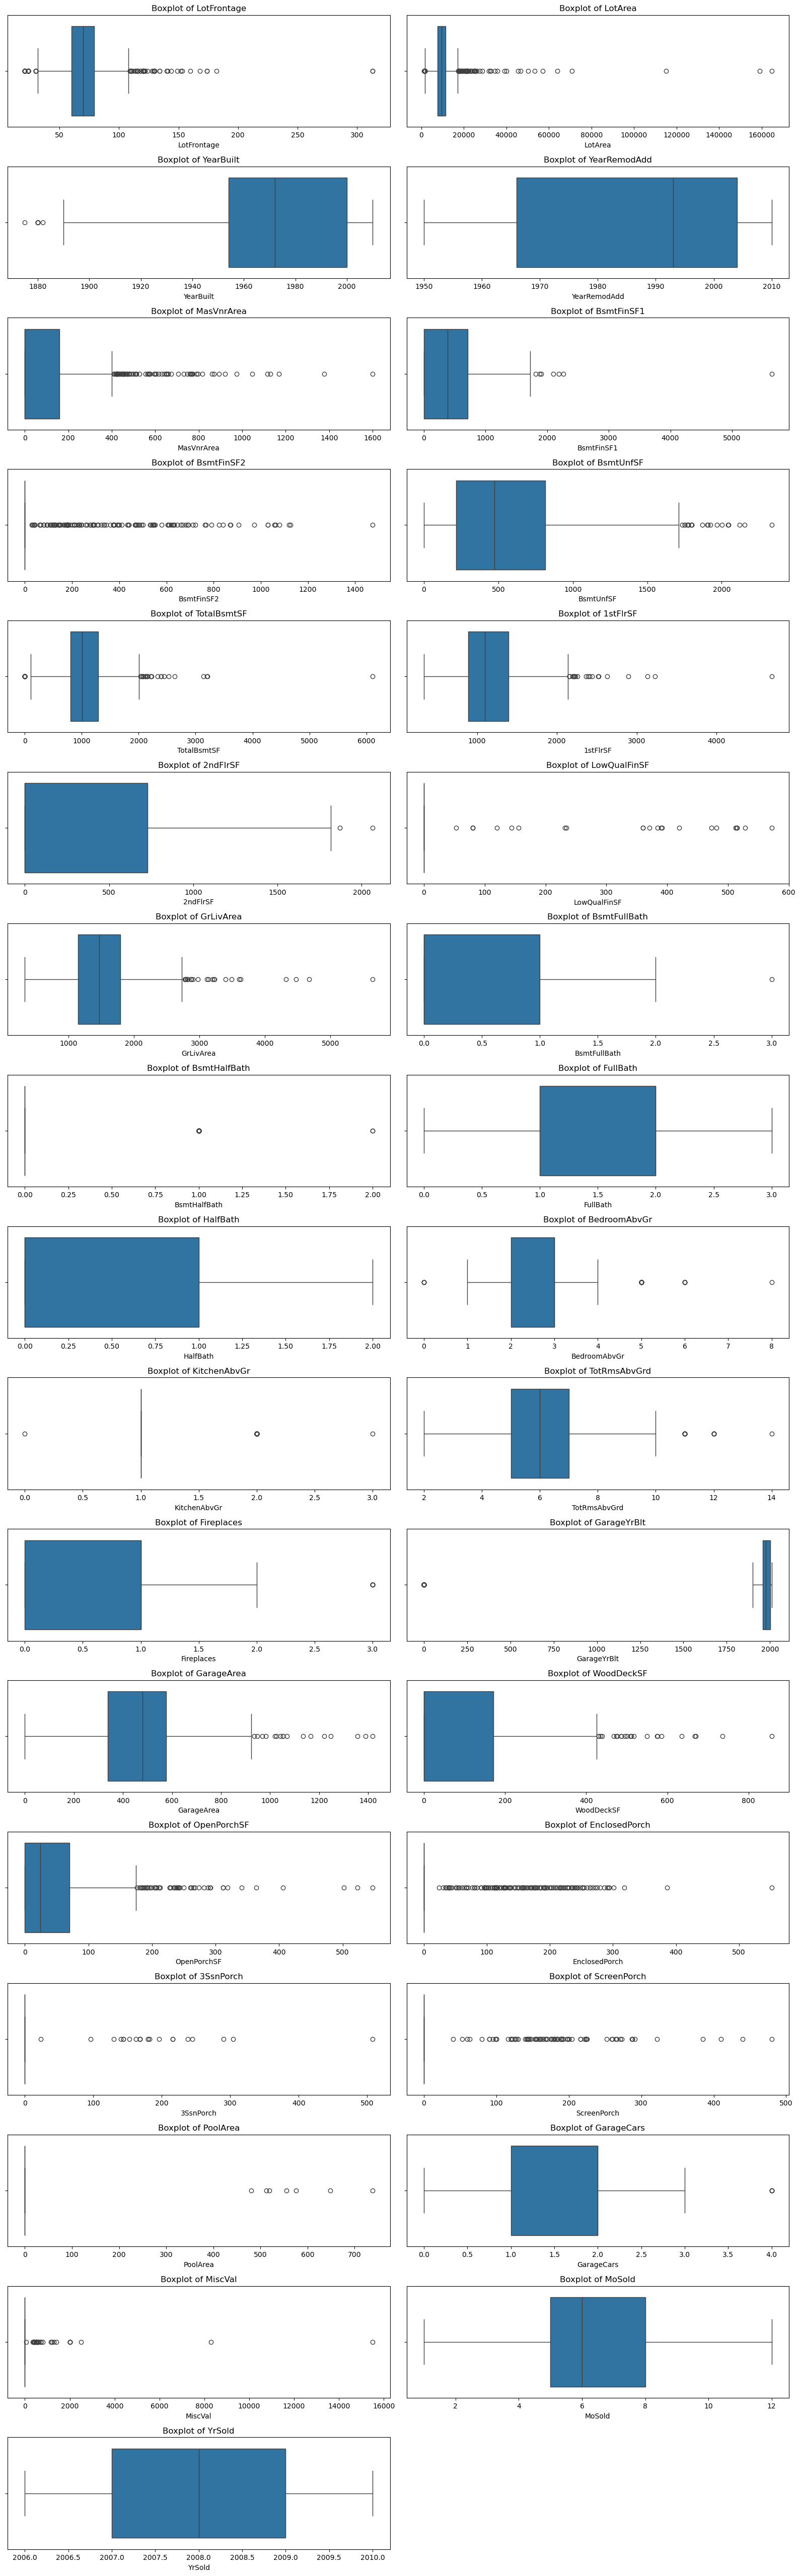

In [412]:
#making boxplots to check numerical column outliers
plt.figure(figsize=[16, (len(numerical_columns)*3)])
for i, columns in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 2, i+1)
    sns.boxplot(x=data[columns])
    plt.title(f"Boxplot of {columns}")
plt.tight_layout()
plt.show()

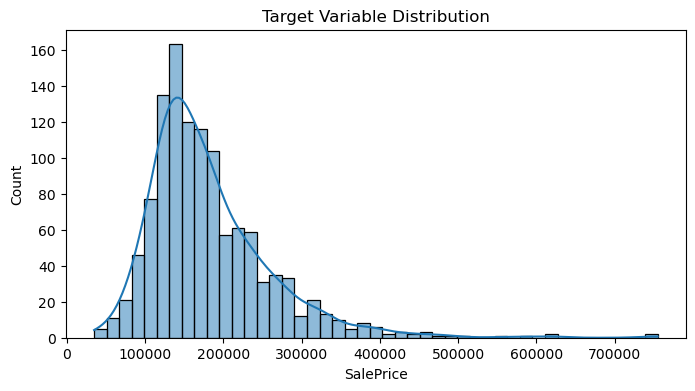

In [413]:
target_variable = "SalePrice"  # change if different
plt.figure(figsize=(8, 4))
sns.histplot(data[target_variable], kde=True)
plt.title("Target Variable Distribution")
plt.show()

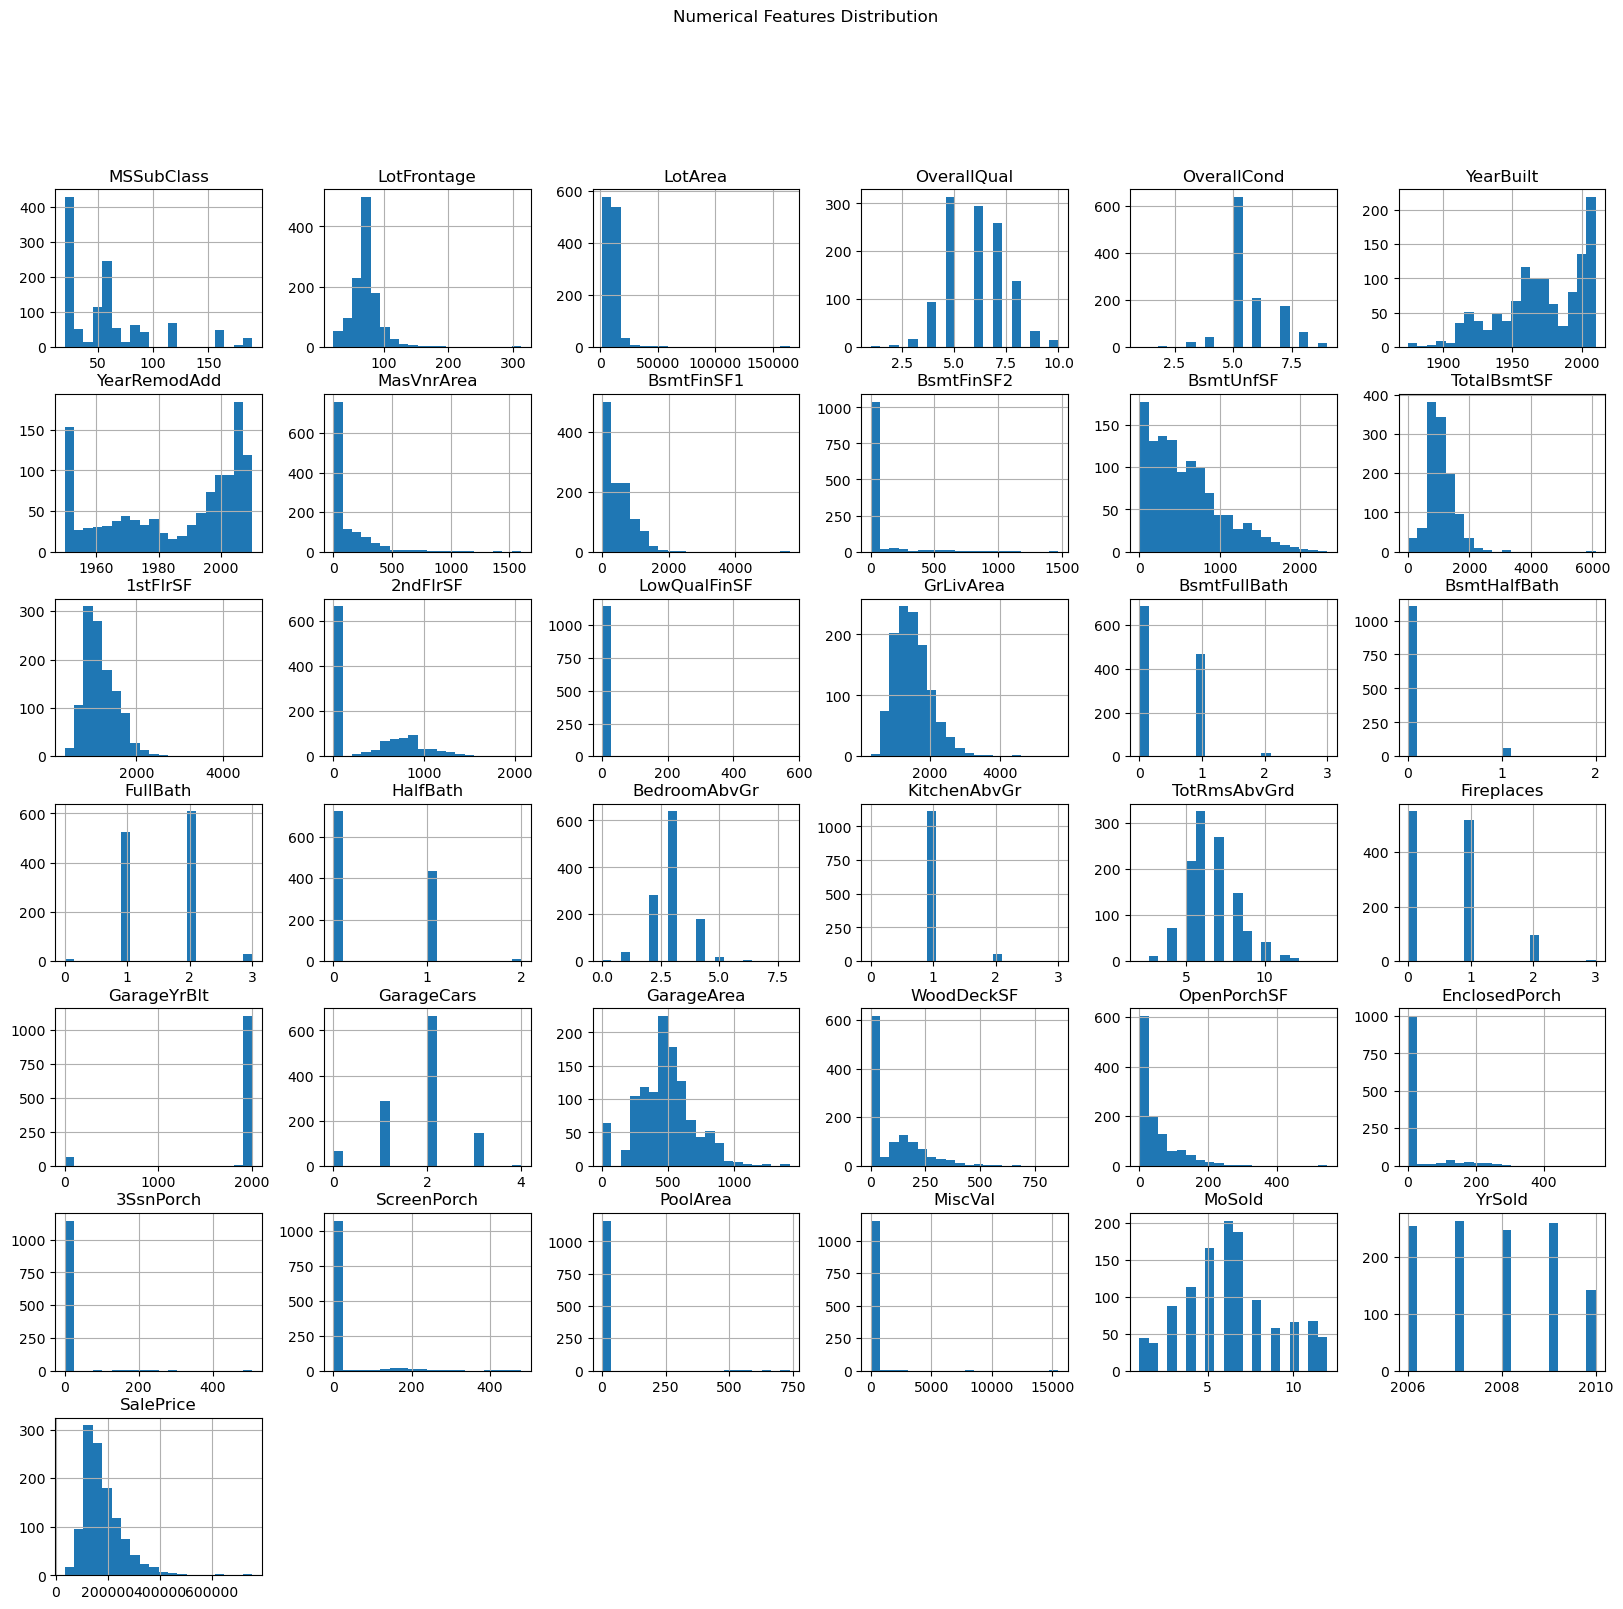

In [414]:
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
data[numerical_columns].hist(bins=20, figsize=(20, 18))
plt.suptitle("Numerical Features Distribution")
plt.show()

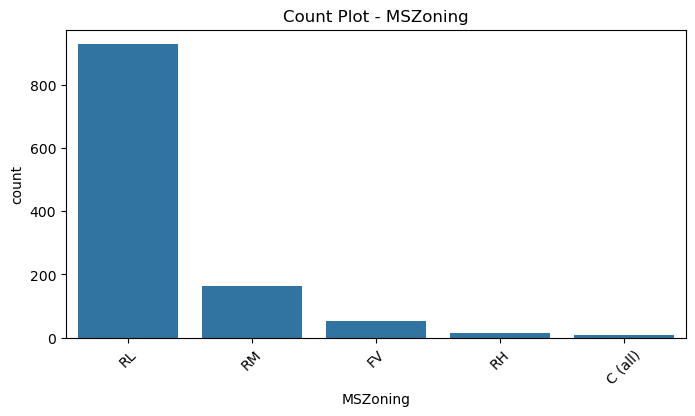

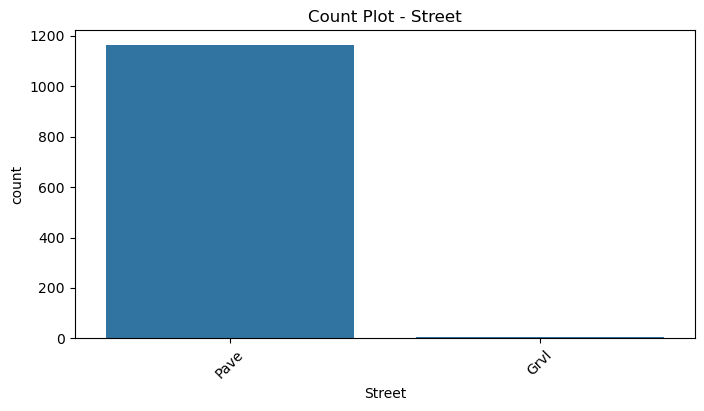

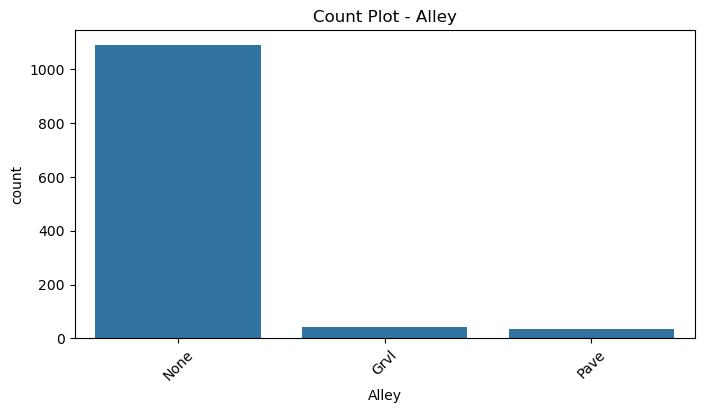

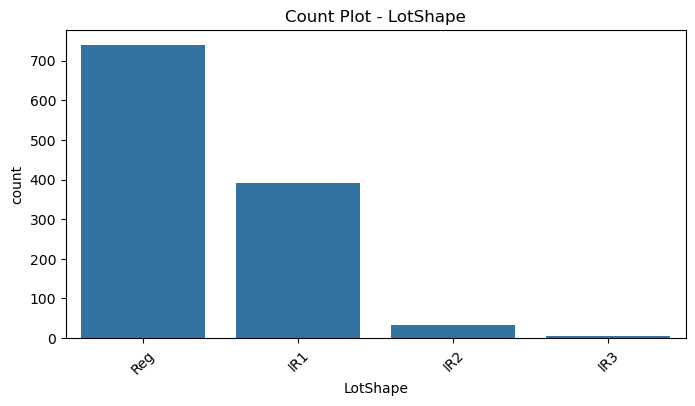

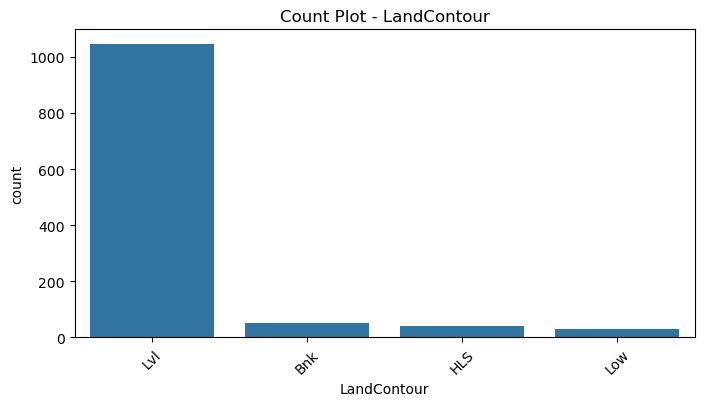

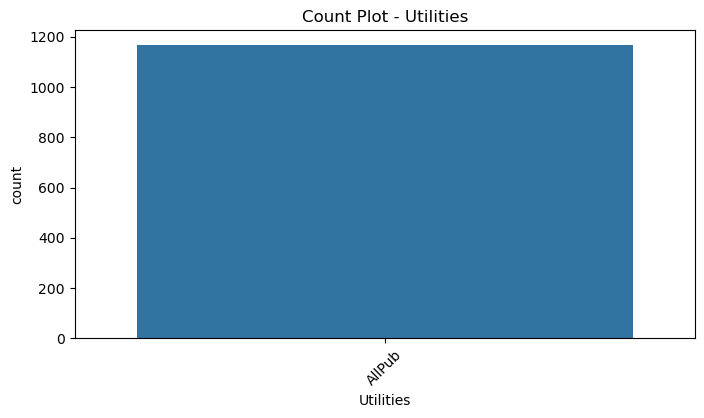

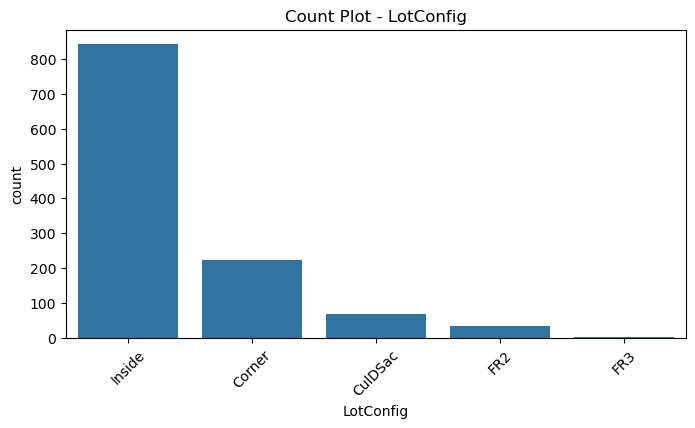

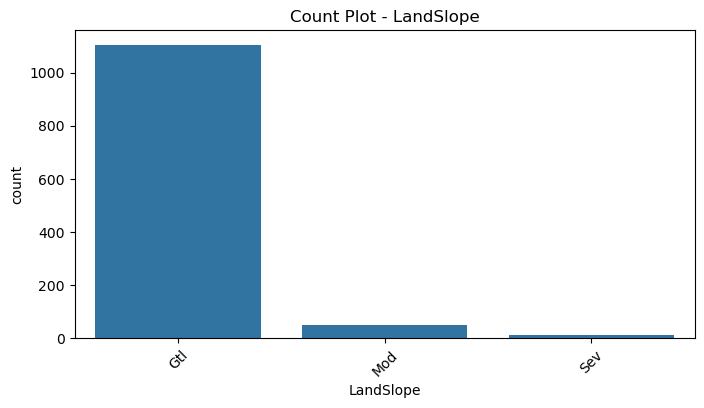

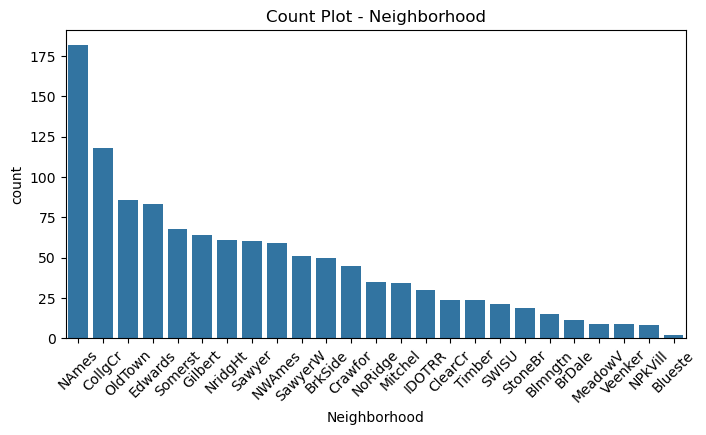

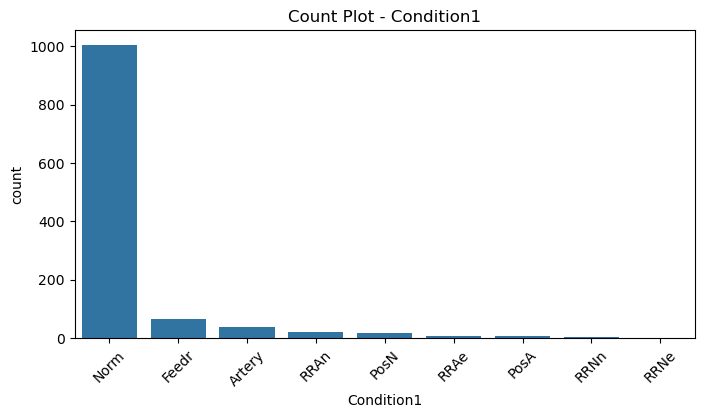

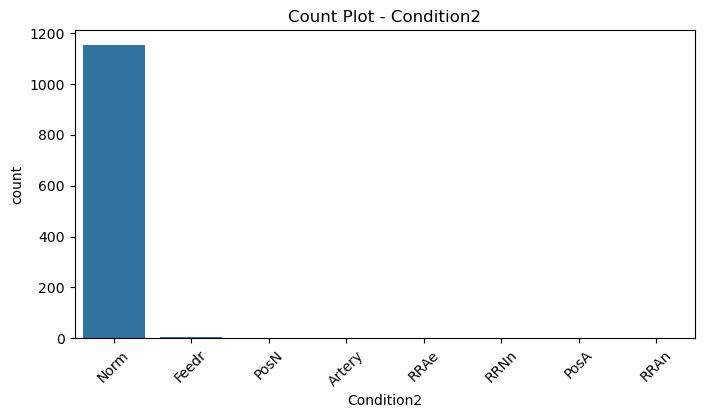

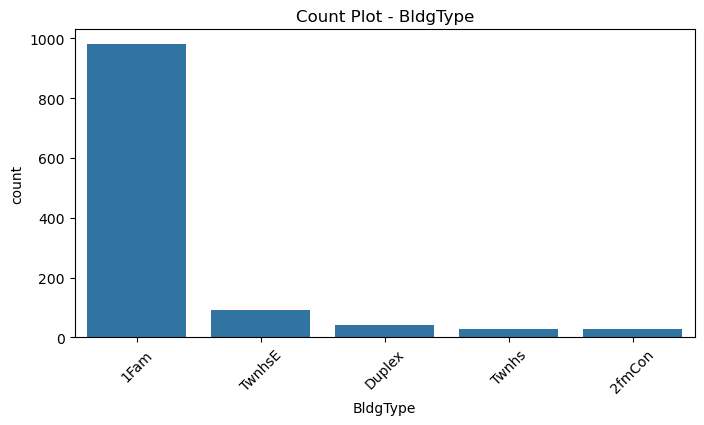

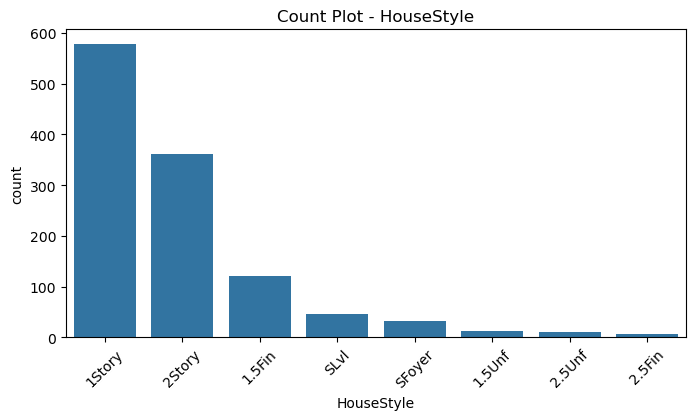

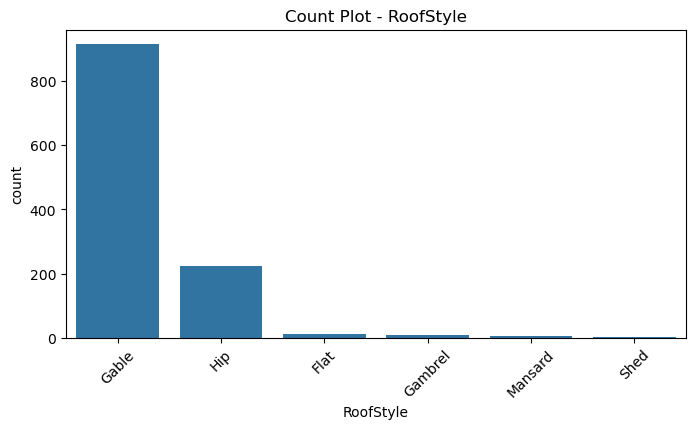

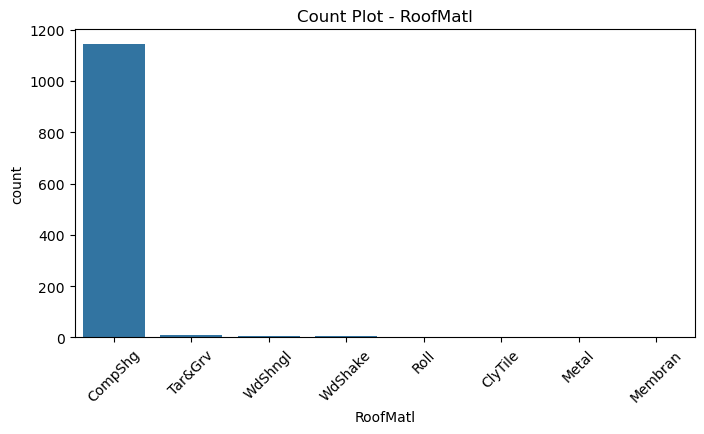

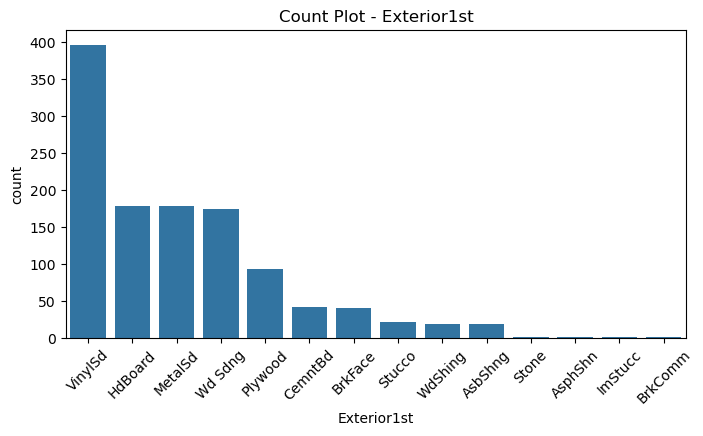

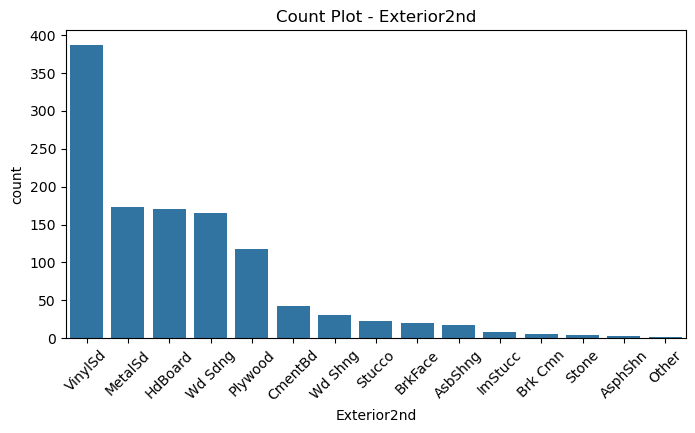

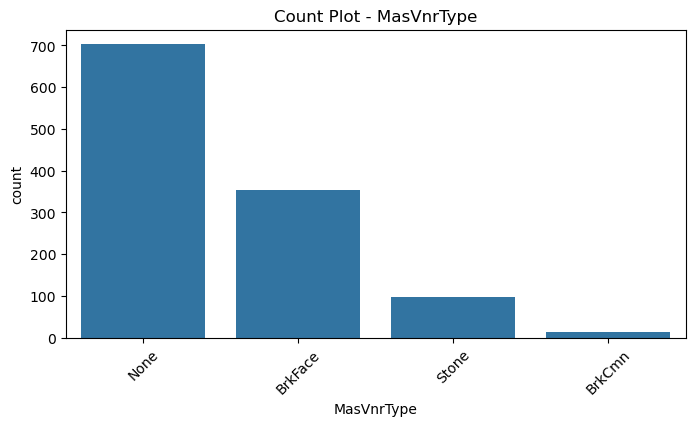

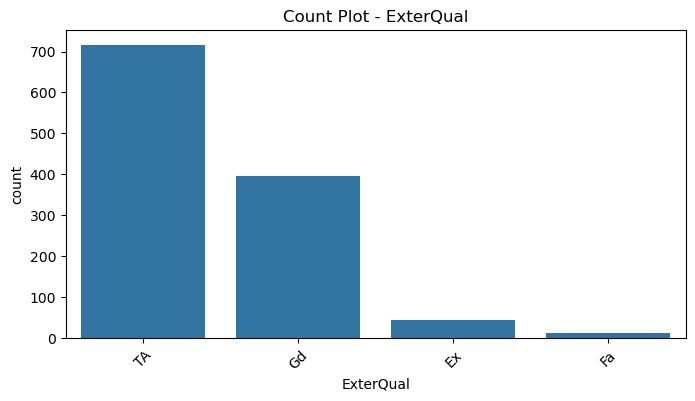

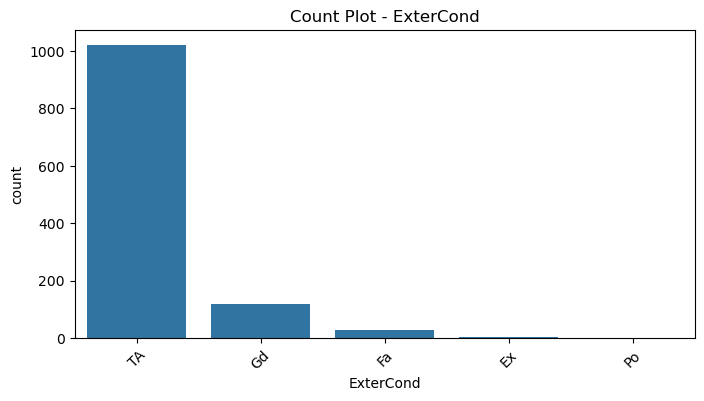

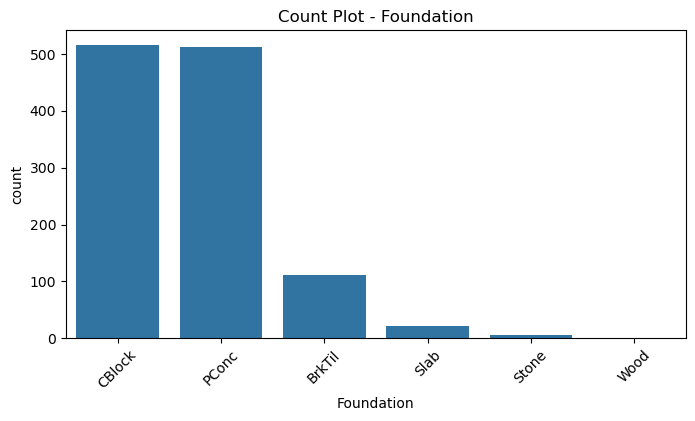

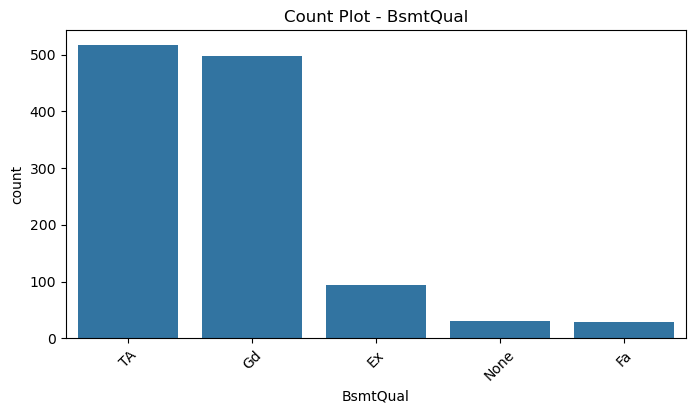

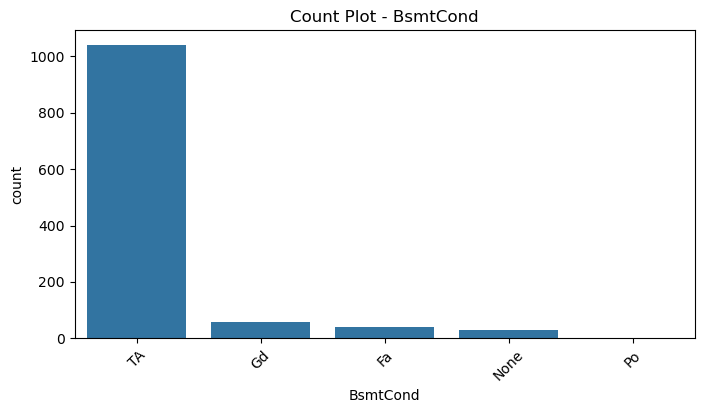

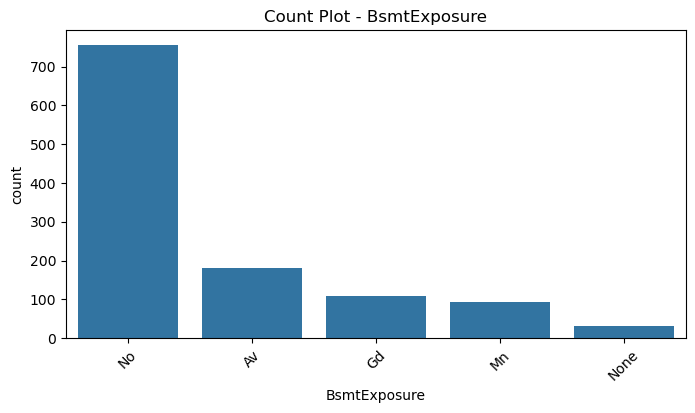

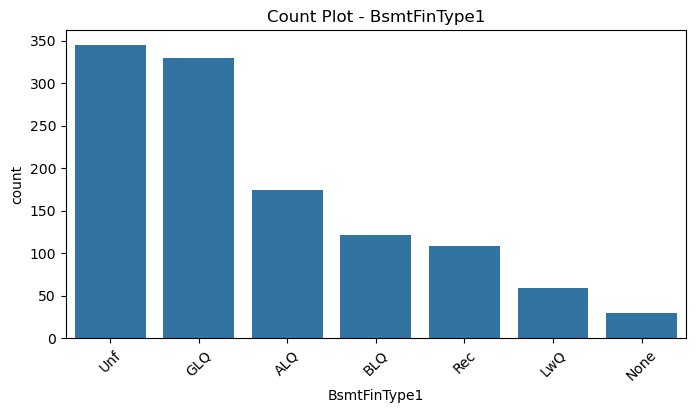

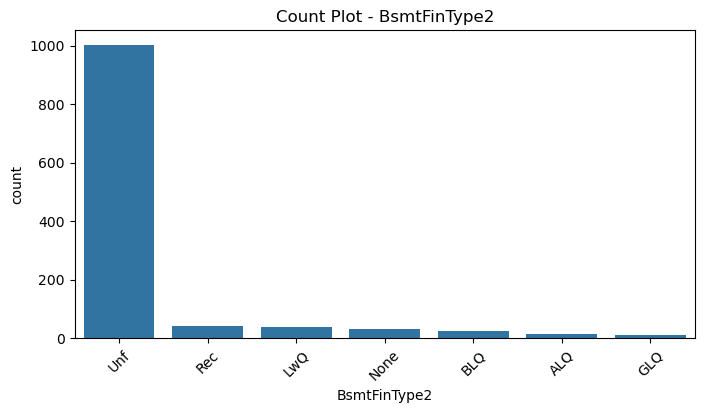

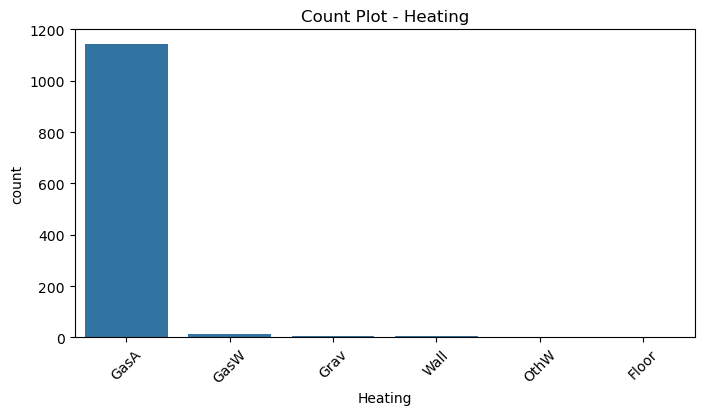

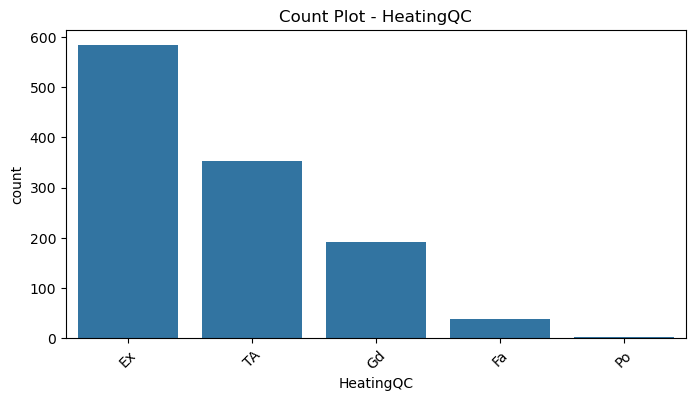

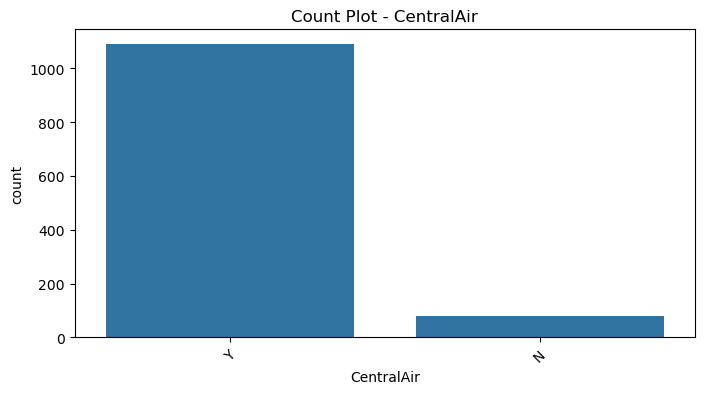

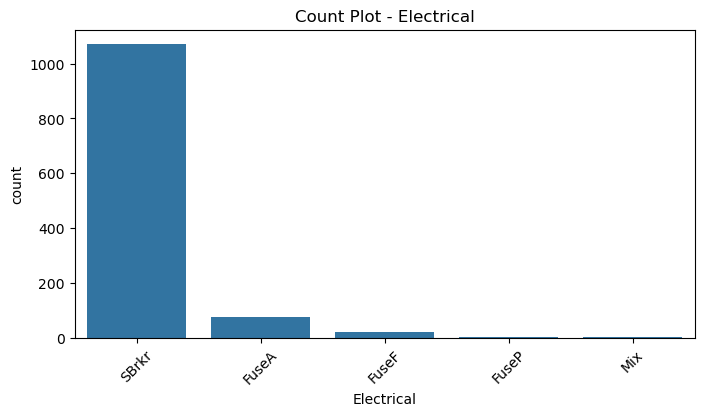

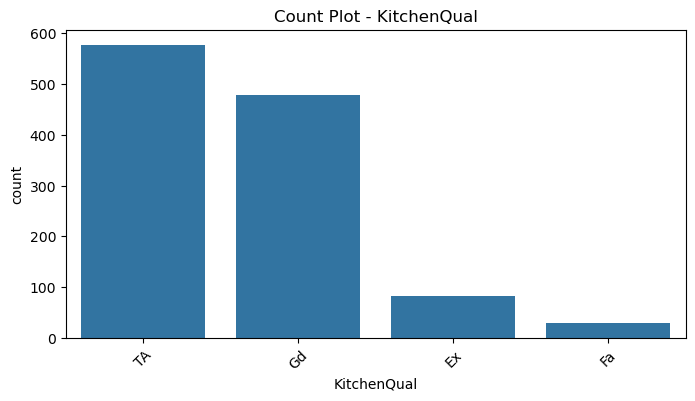

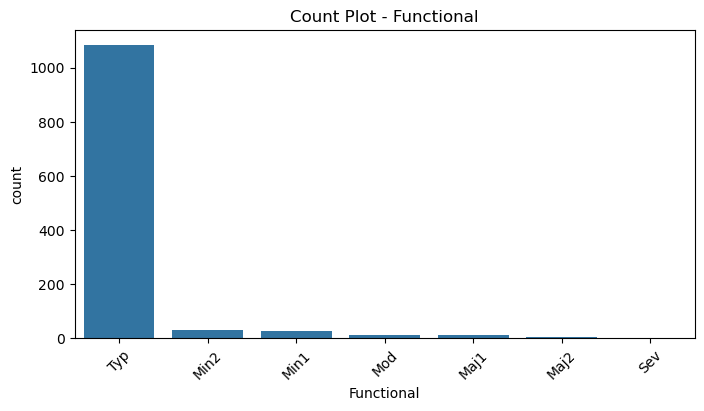

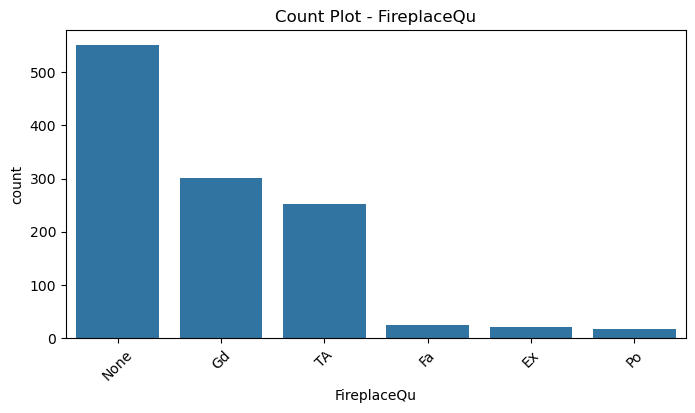

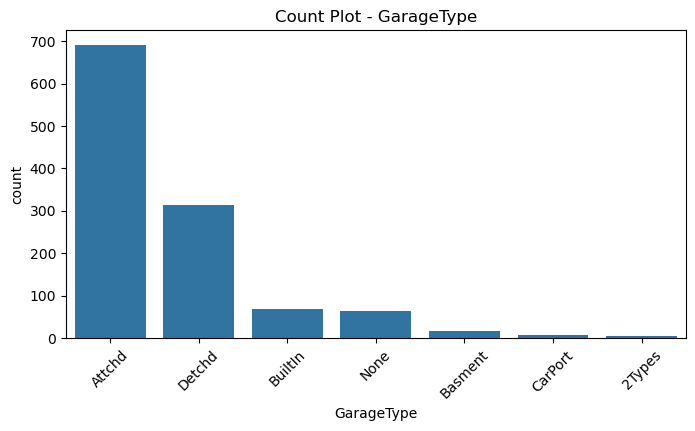

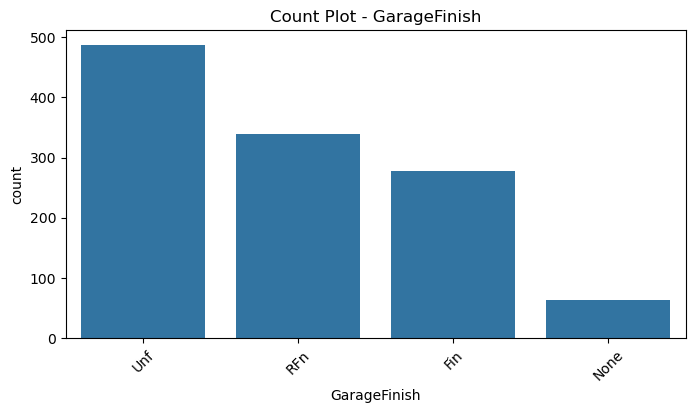

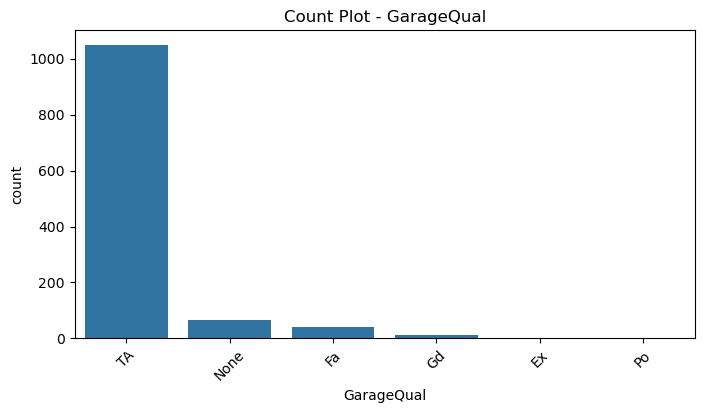

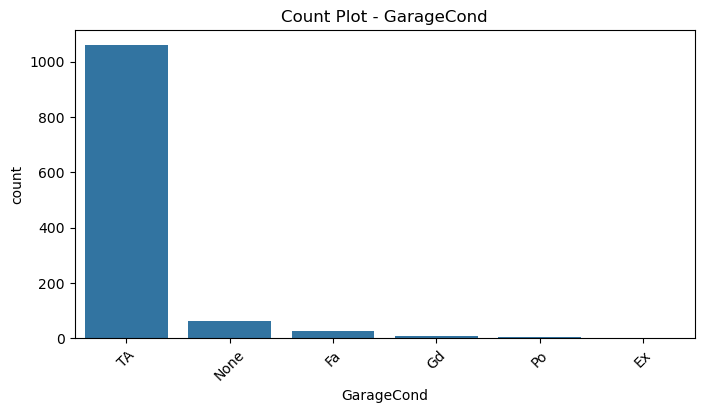

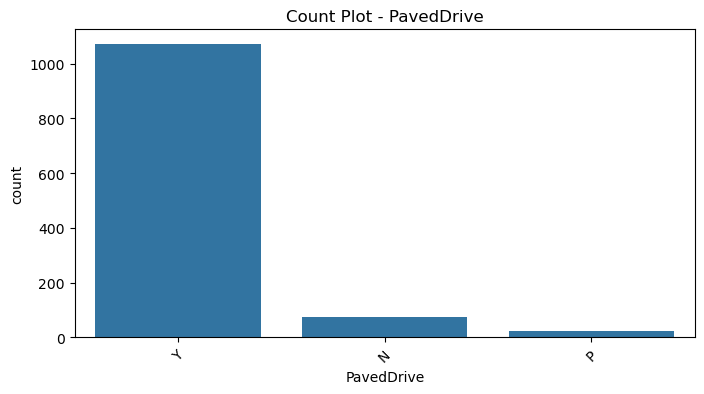

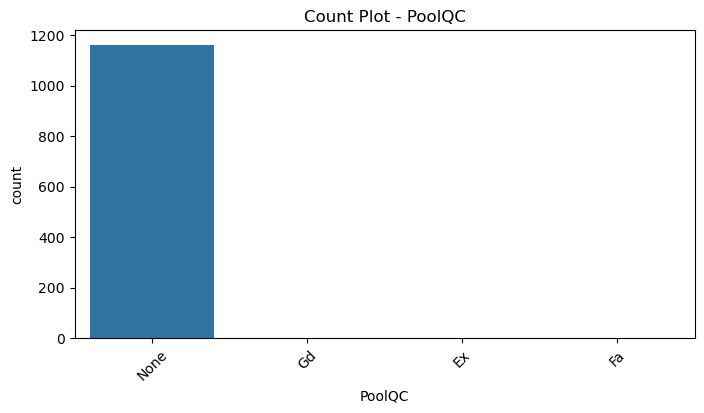

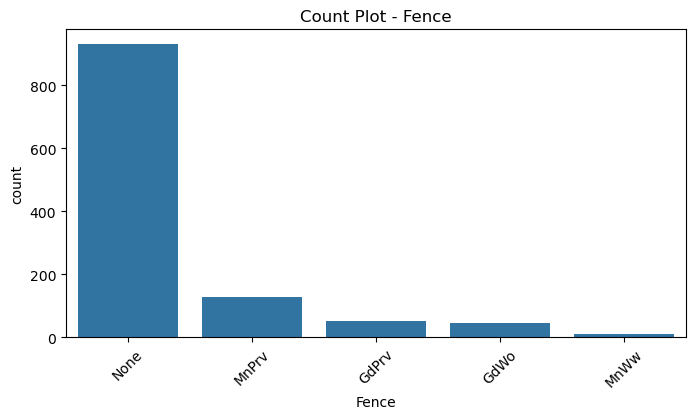

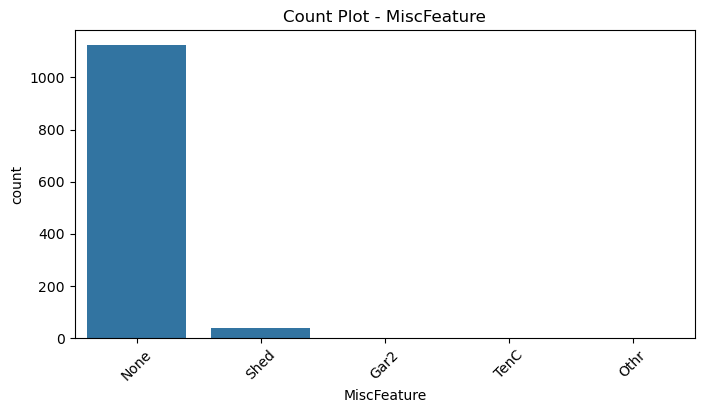

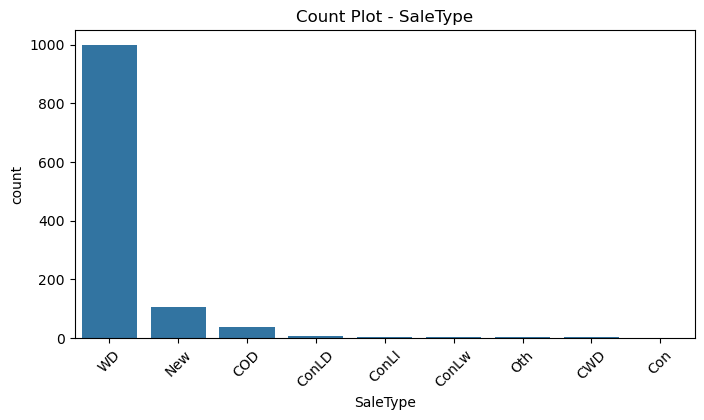

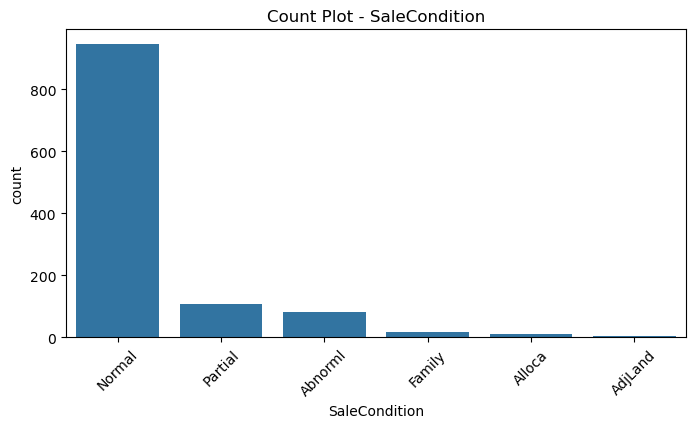

In [415]:
categorical_columns = data.select_dtypes(include=["object"]).columns.tolist()
for columns in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=columns, data=data, order=data[columns].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Count Plot - {columns}")
    plt.show()

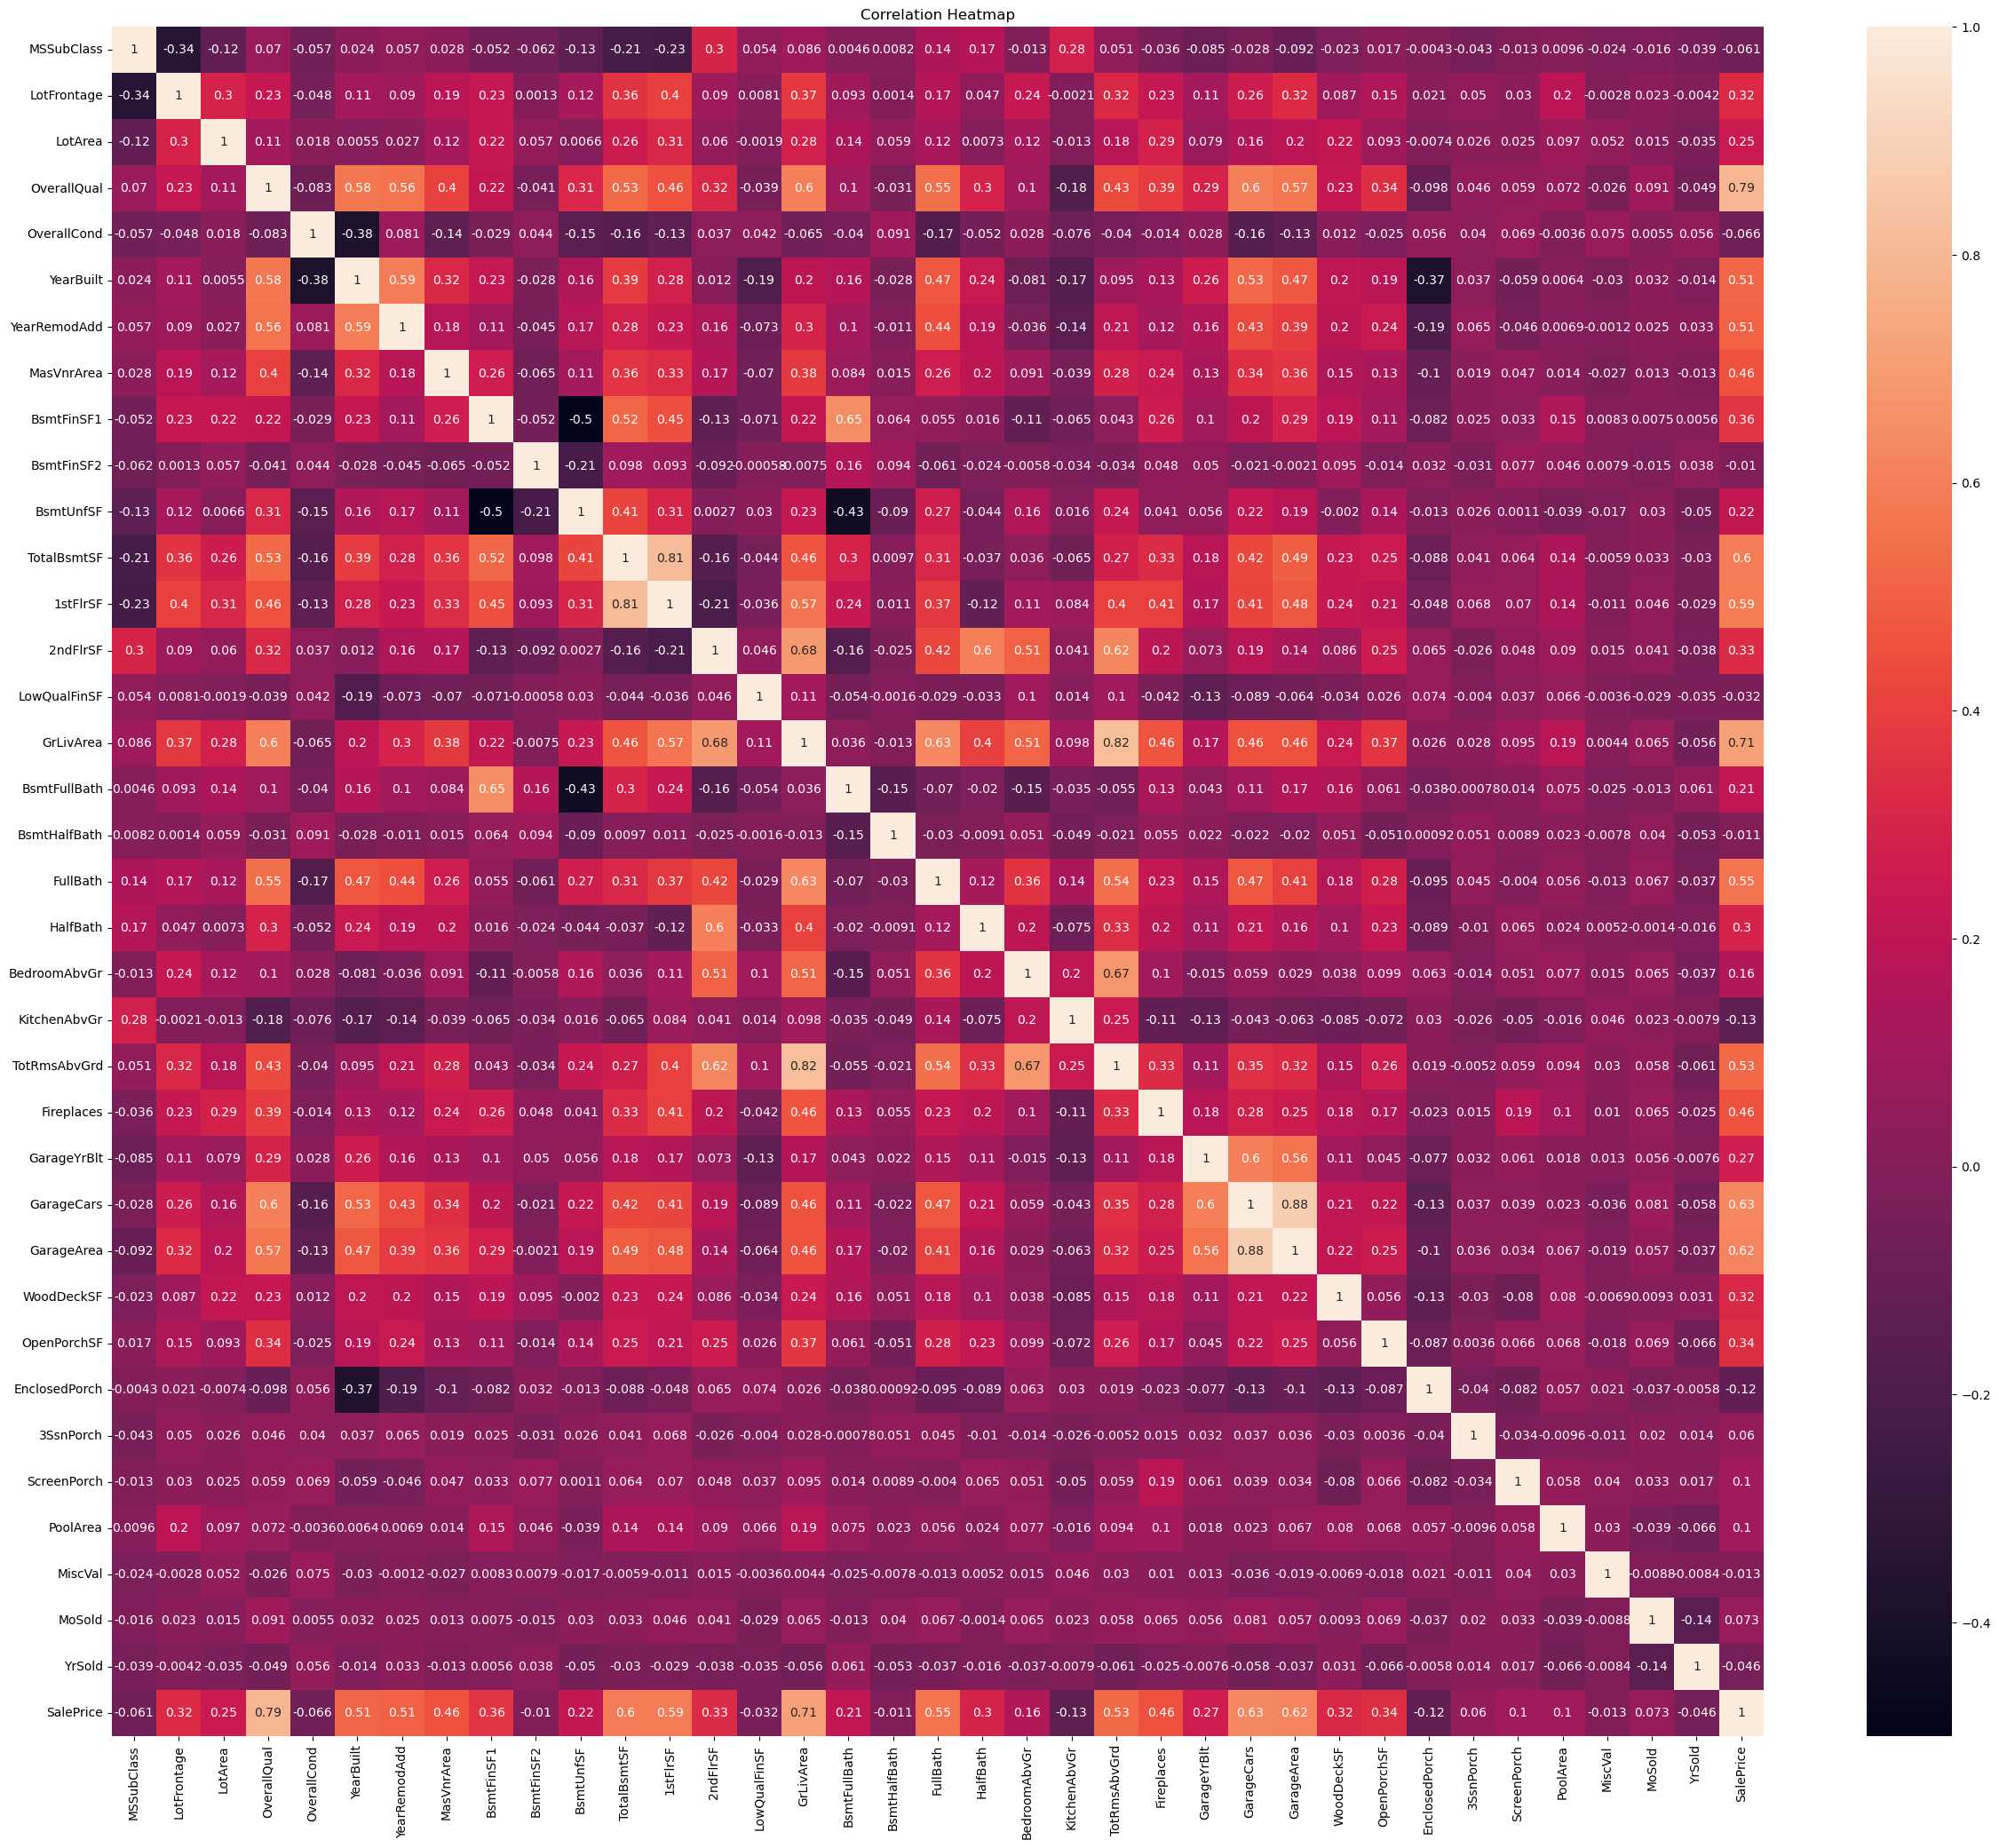

In [416]:
plt.figure(figsize=(30, 25))
corr = data[numerical_columns].corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [417]:
skew_values = data[numerical_columns].skew().sort_values(ascending=False)
print("\nSkewness of numerical features:\n", skew_values)


Skewness of numerical features:
 MiscVal          23.065943
PoolArea         13.243711
LotArea          10.659285
3SsnPorch         9.770611
LowQualFinSF      8.666142
BsmtFinSF2        4.365829
KitchenAbvGr      4.365259
BsmtHalfBath      4.264403
ScreenPorch       4.105741
EnclosedPorch     3.043610
MasVnrArea        2.835718
LotFrontage       2.733440
OpenPorchSF       2.410840
SalePrice         1.953878
BsmtFinSF1        1.871606
TotalBsmtSF       1.744591
1stFlrSF          1.513707
WoodDeckSF        1.504929
GrLivArea         1.449952
MSSubClass        1.422019
BsmtUnfSF         0.909057
2ndFlrSF          0.823479
Fireplaces        0.671966
HalfBath          0.656492
TotRmsAbvGrd      0.644657
BsmtFullBath      0.627106
OverallCond       0.580714
BedroomAbvGr      0.243855
MoSold            0.220979
GarageArea        0.189665
OverallQual       0.175082
YrSold            0.115765
FullBath          0.057809
GarageCars       -0.358556
YearRemodAdd     -0.495864
YearBuilt        -0.5

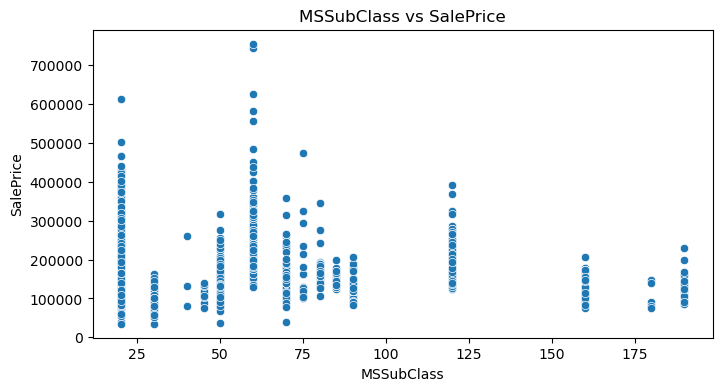

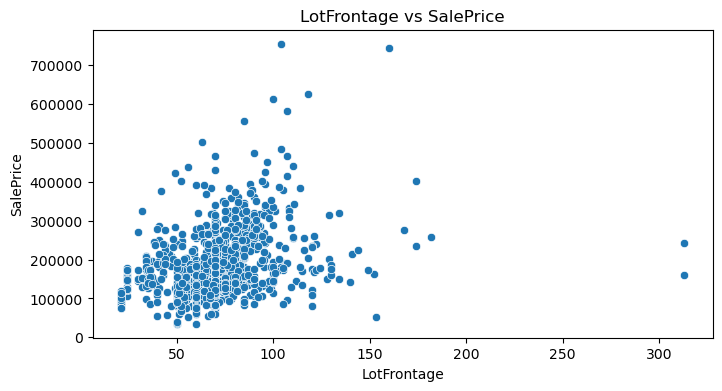

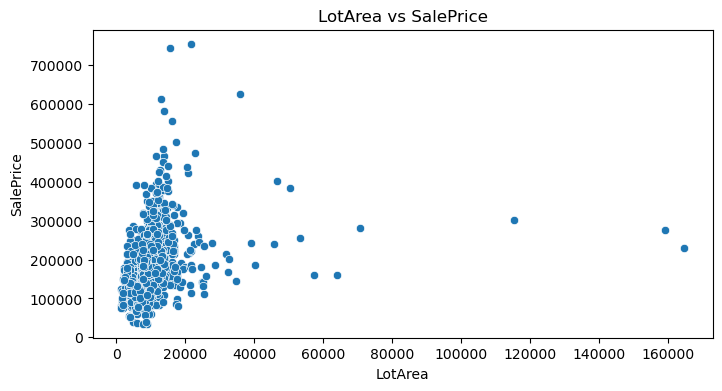

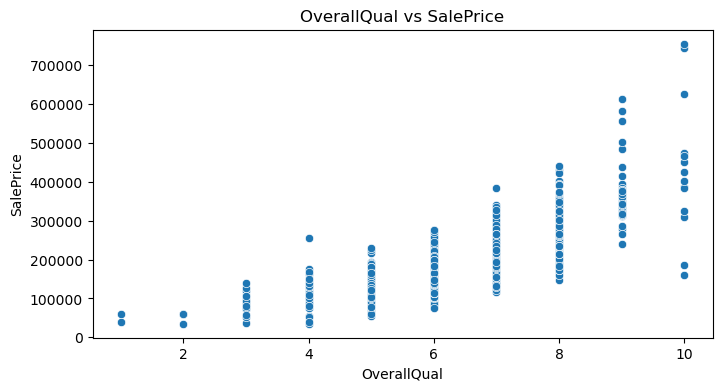

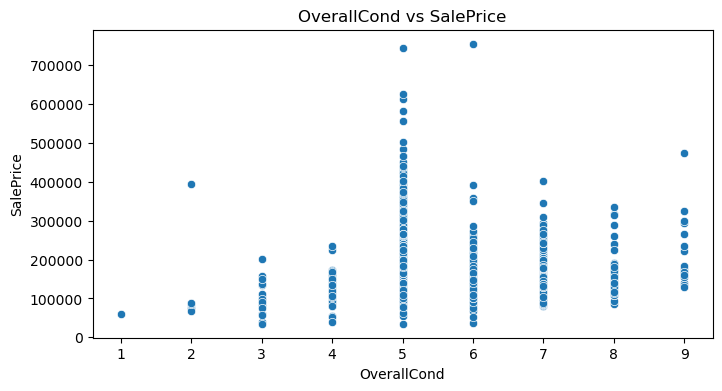

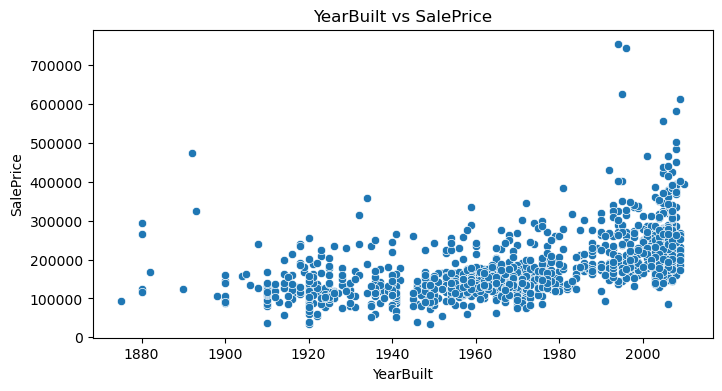

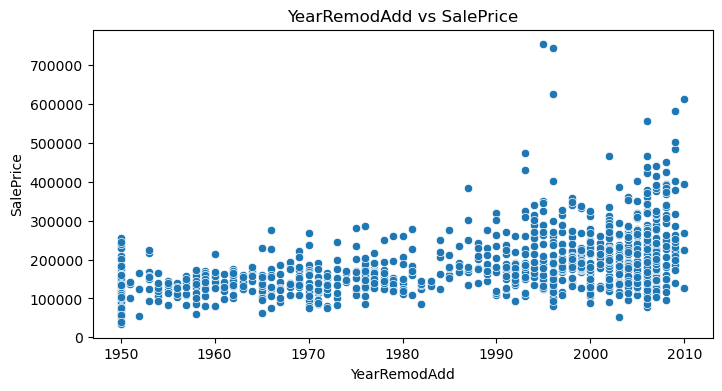

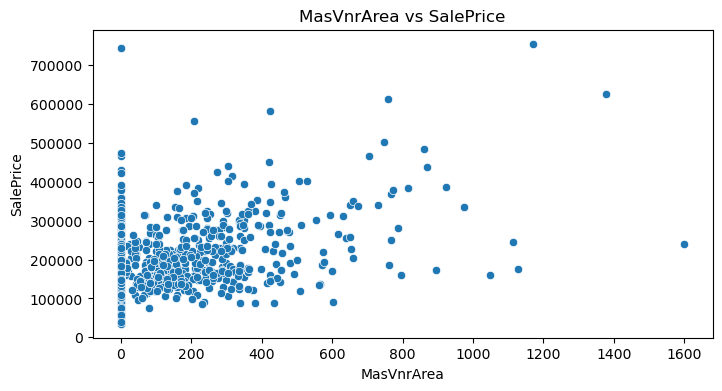

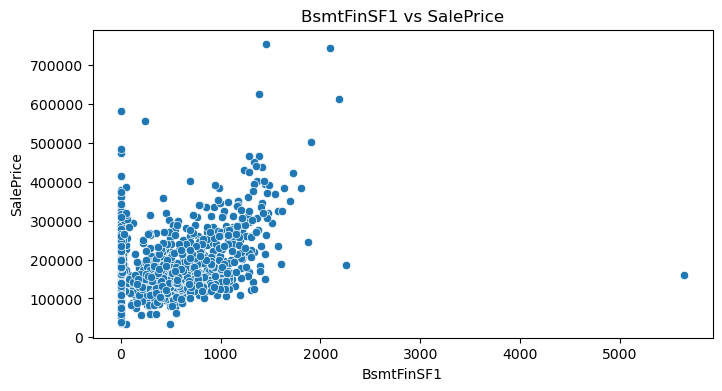

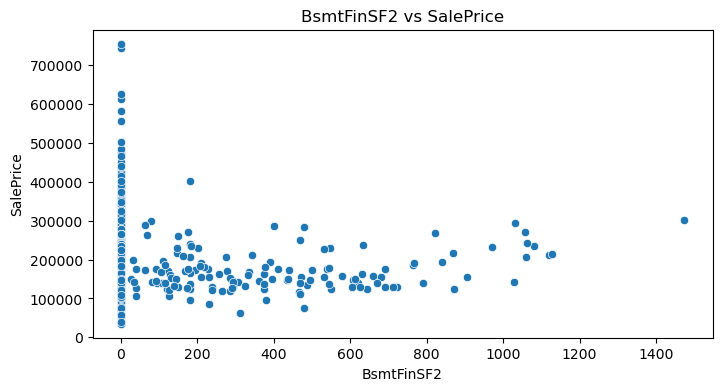

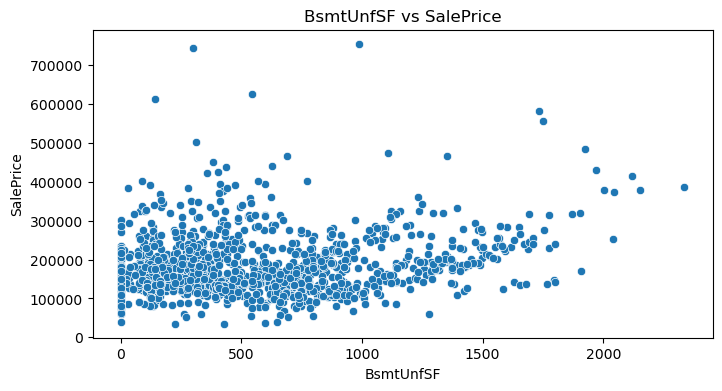

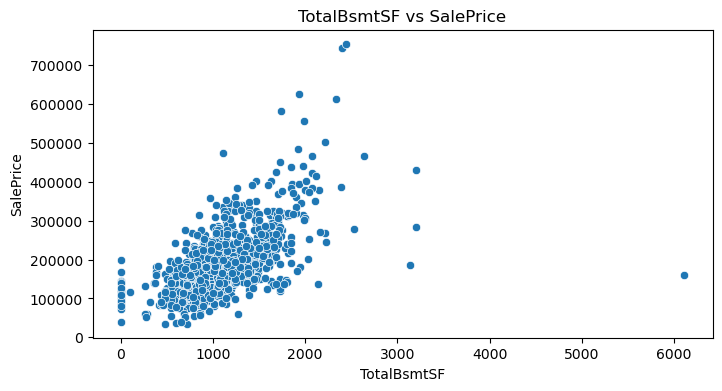

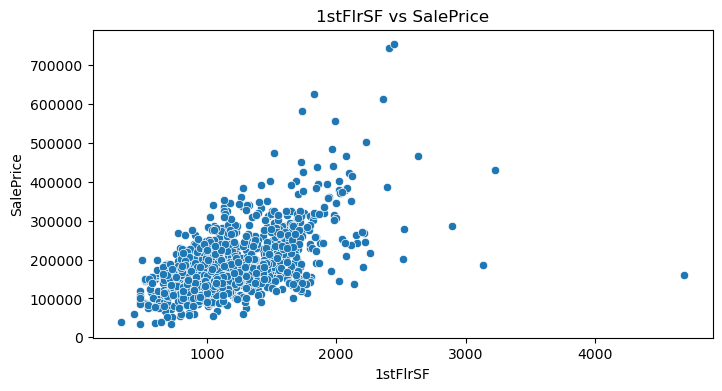

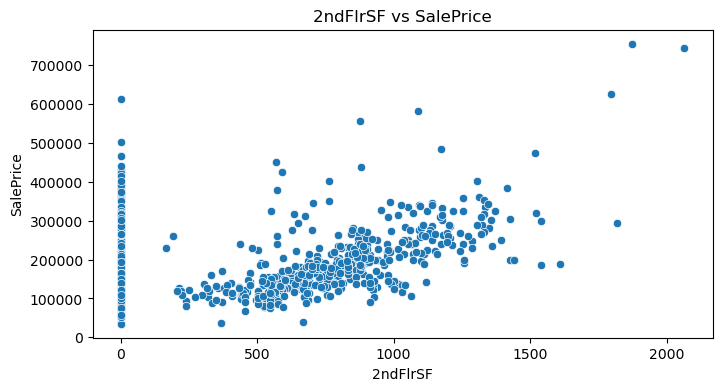

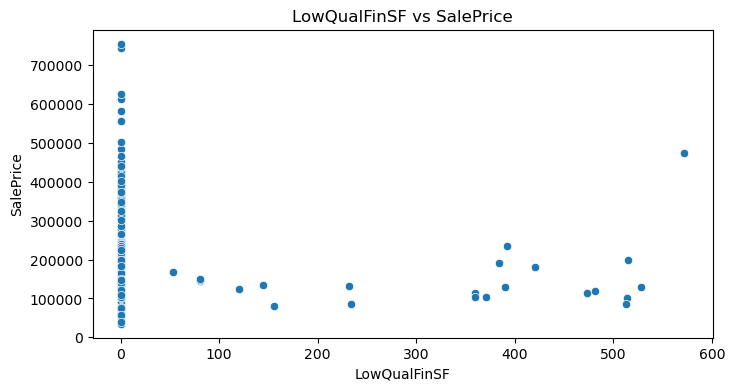

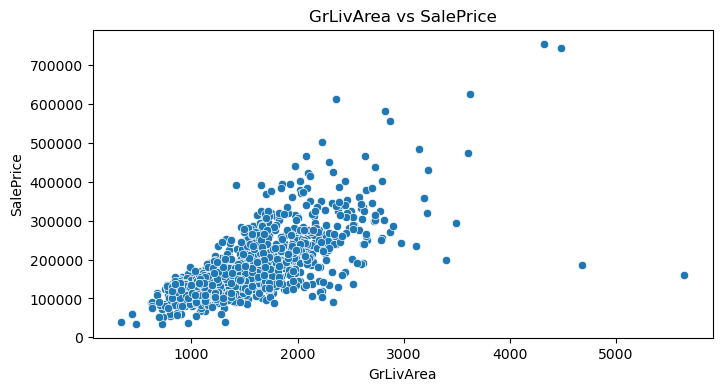

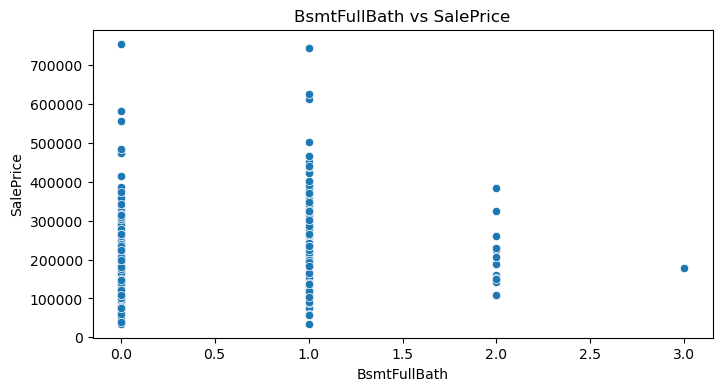

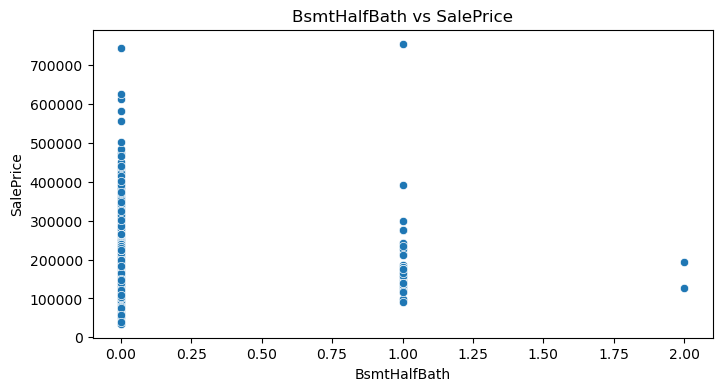

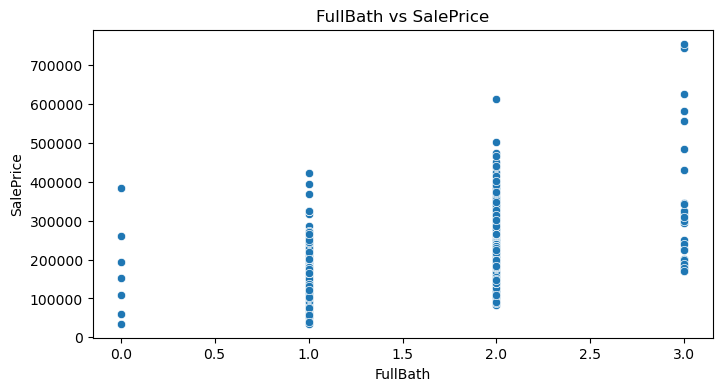

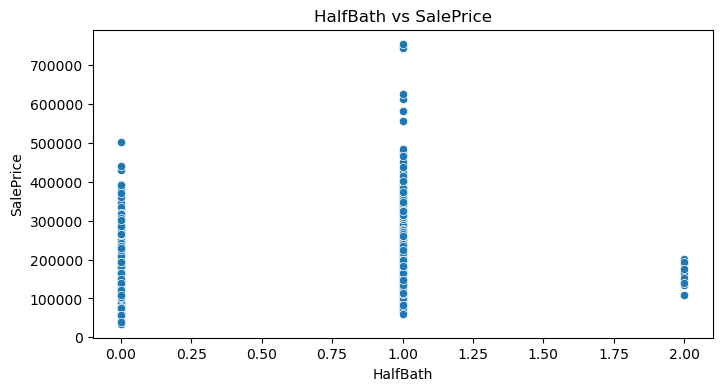

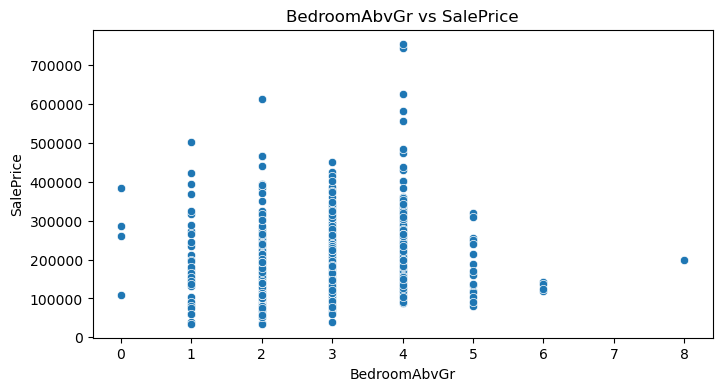

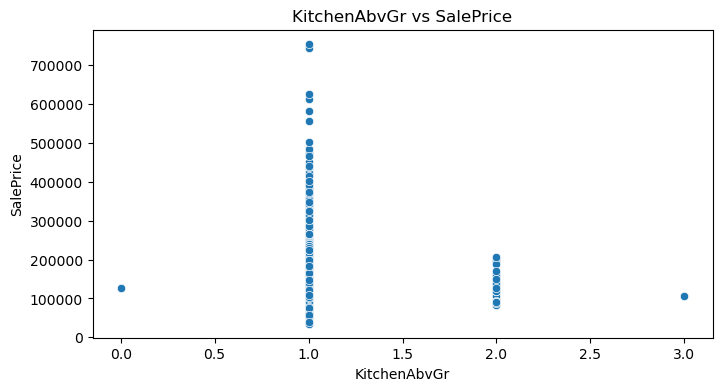

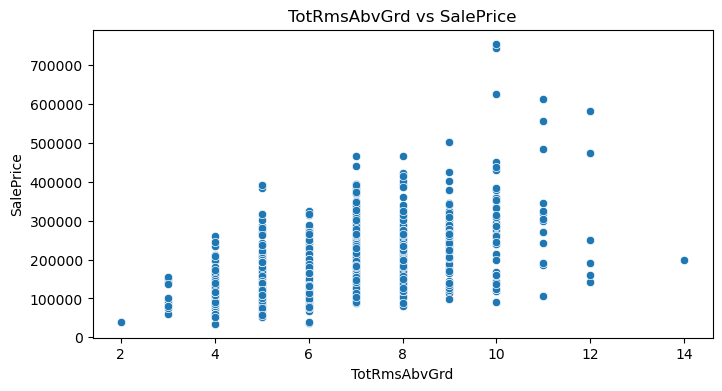

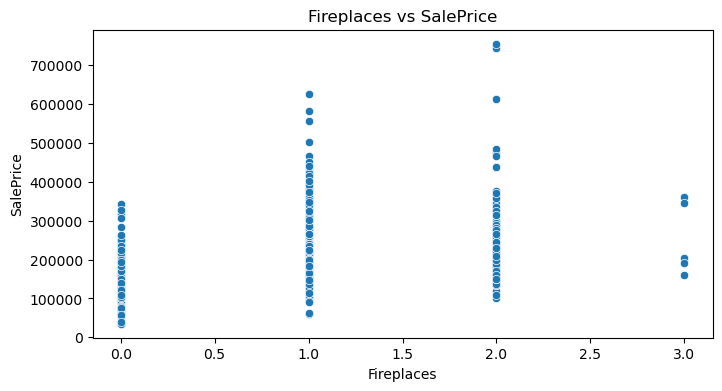

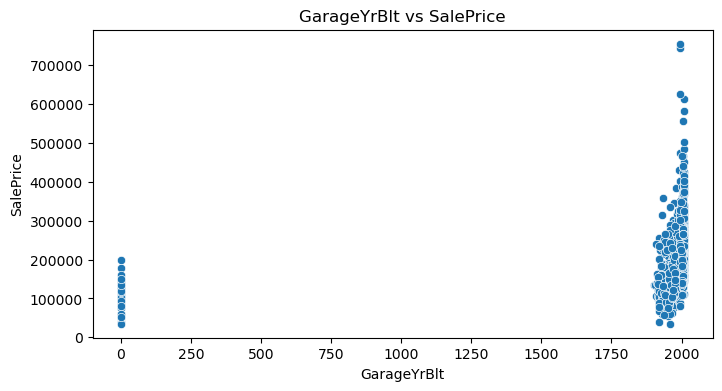

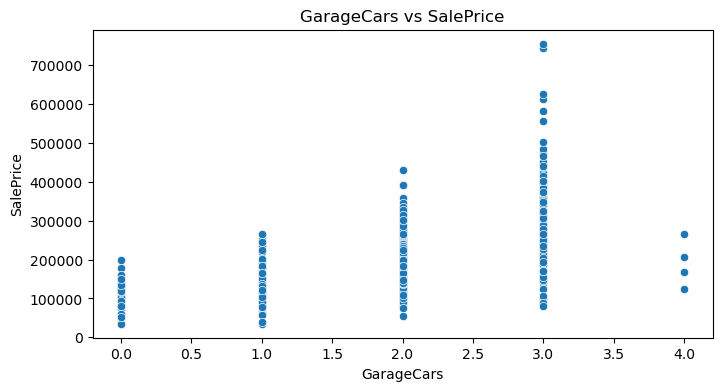

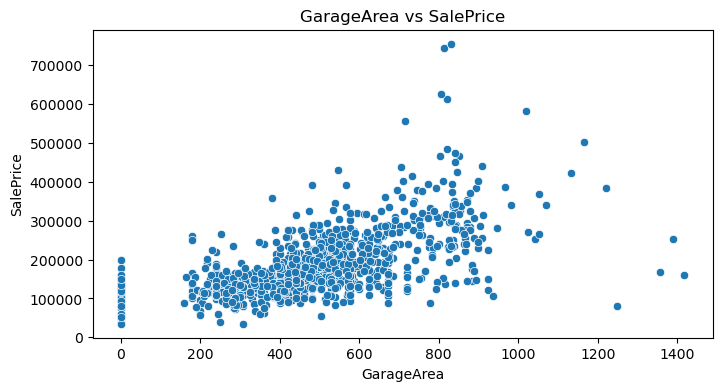

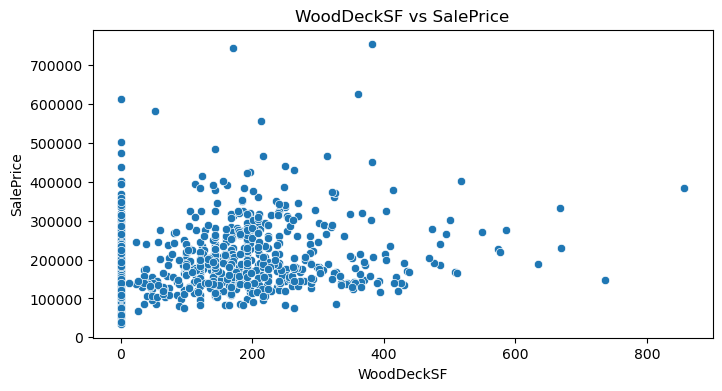

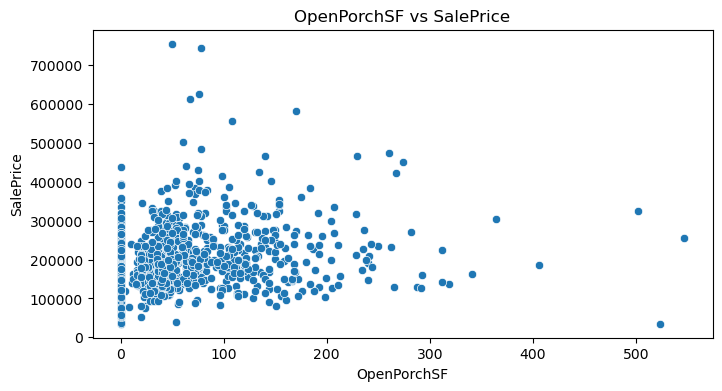

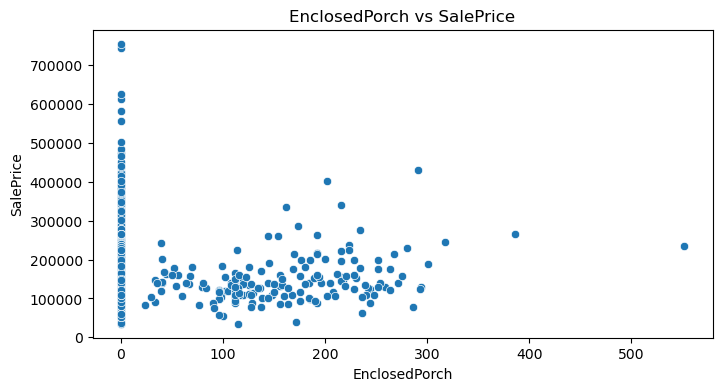

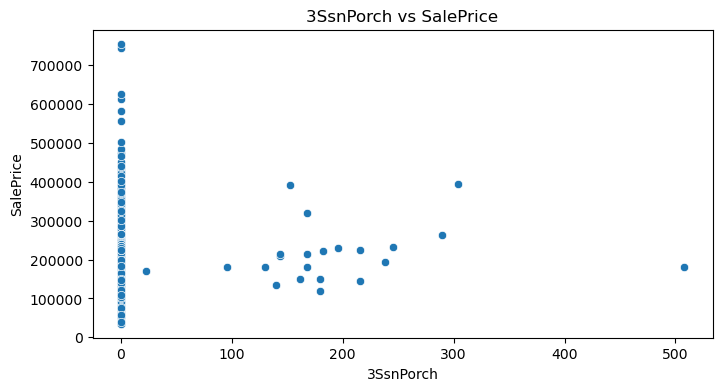

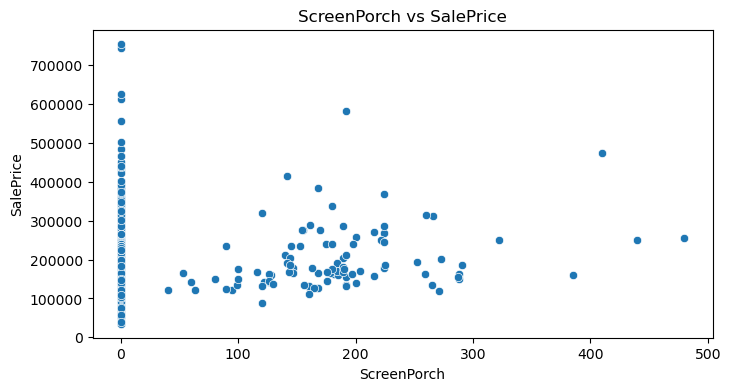

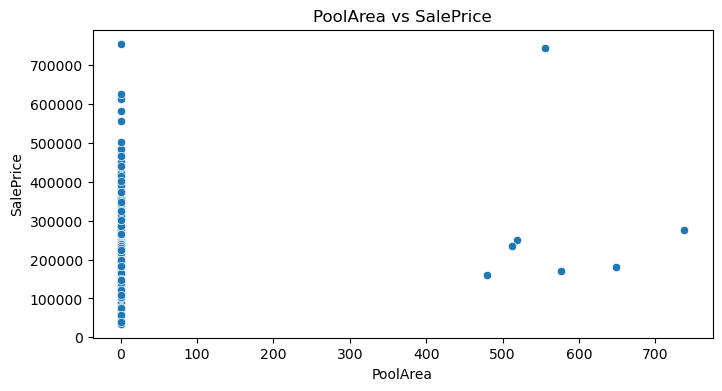

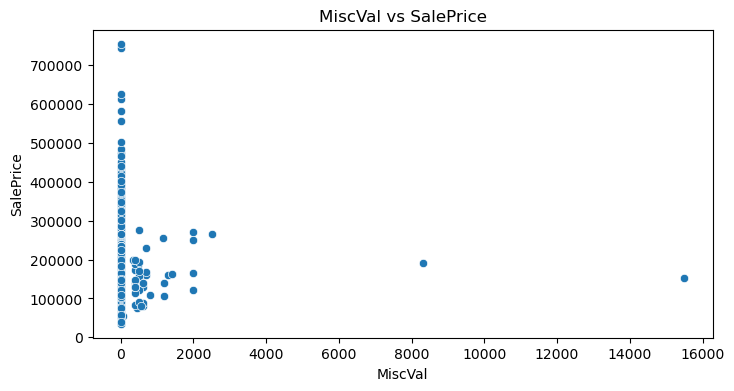

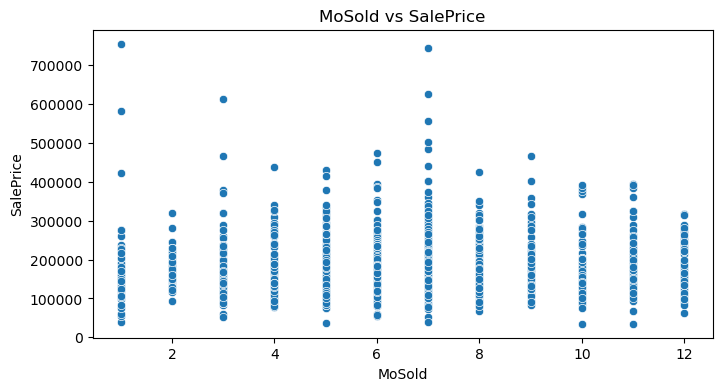

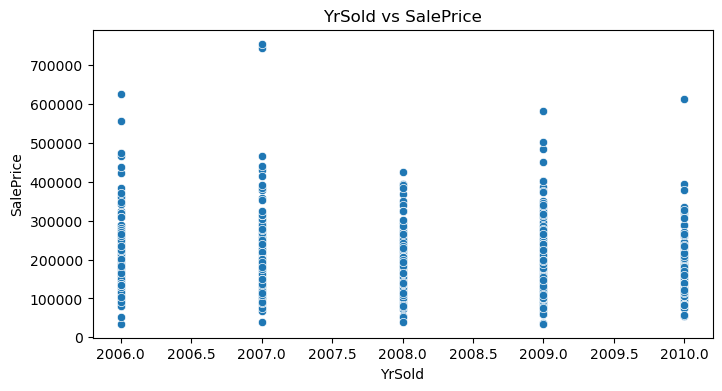

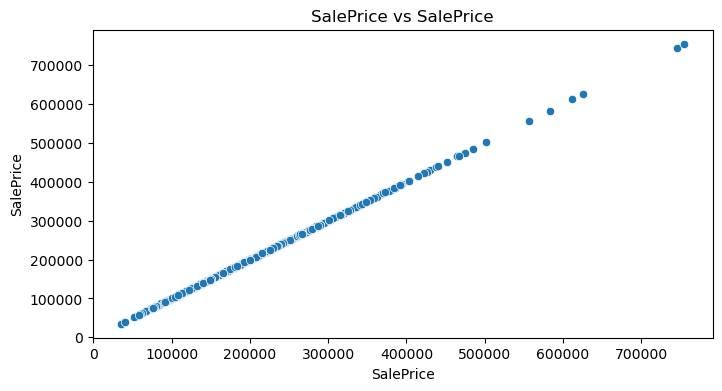

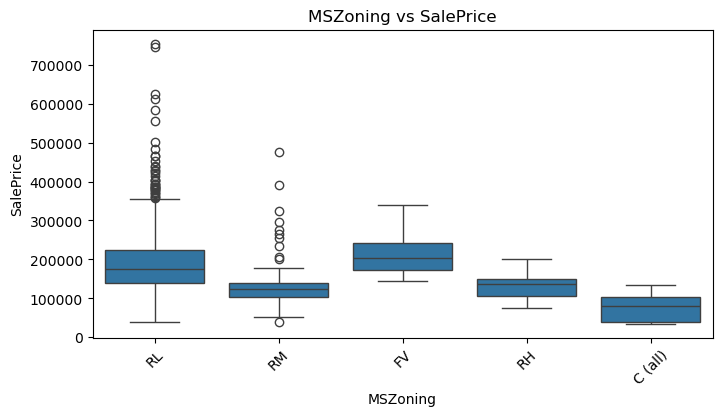

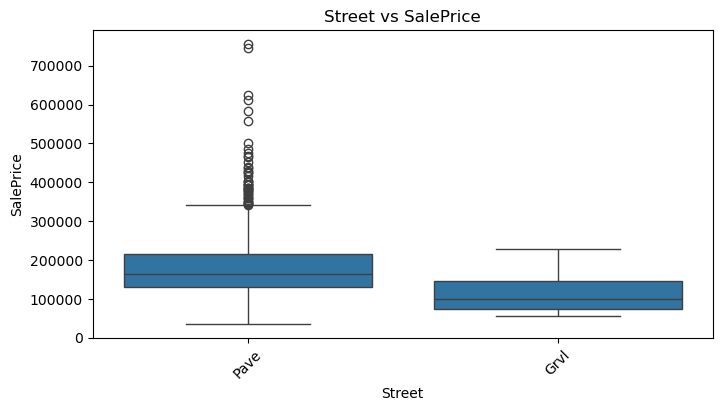

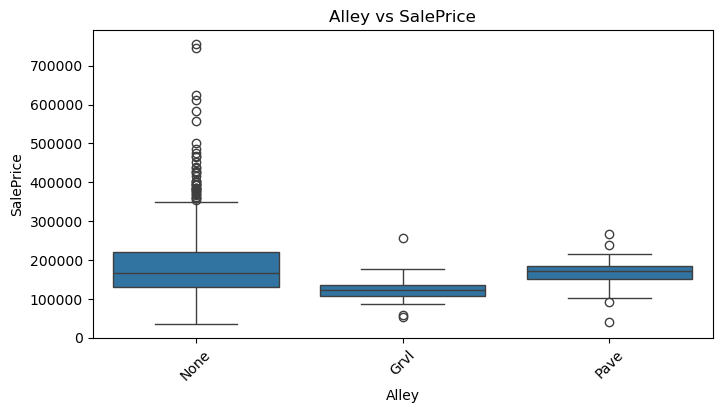

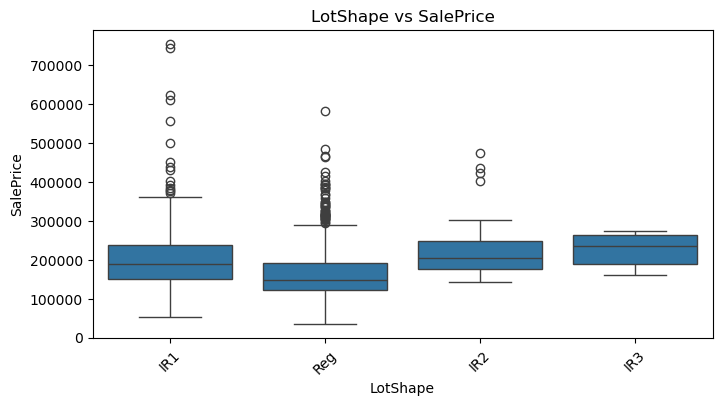

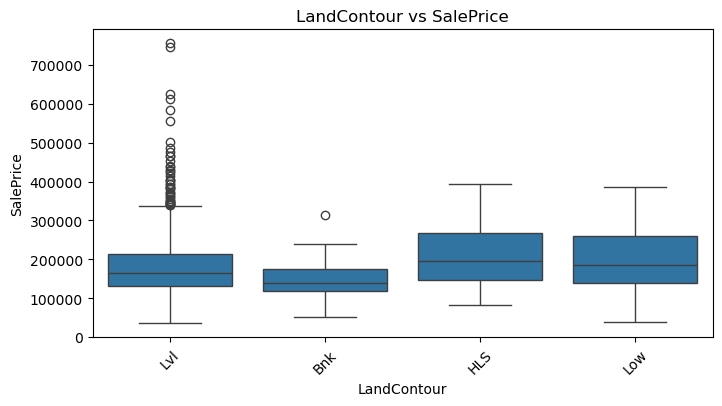

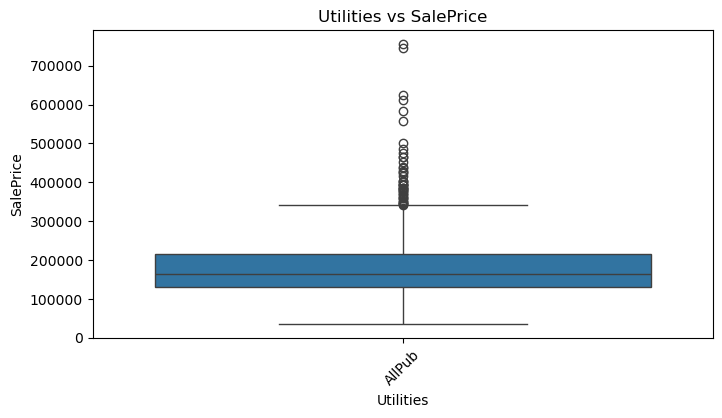

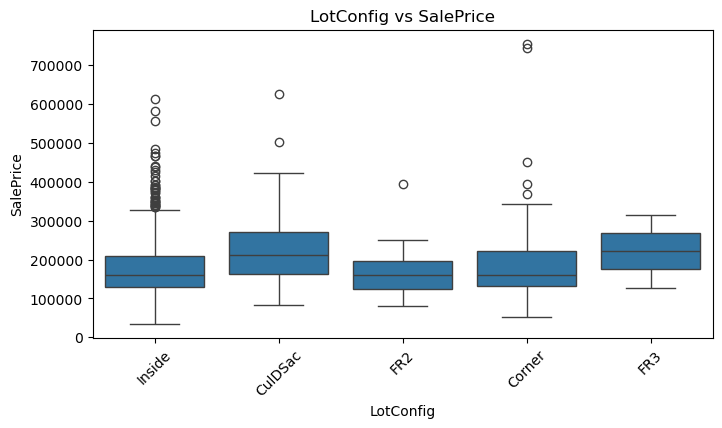

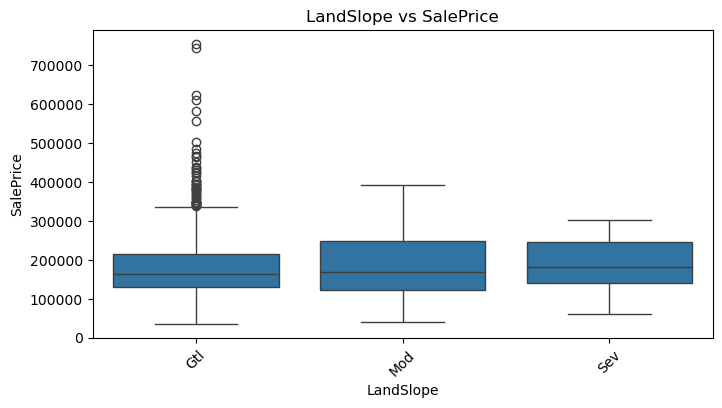

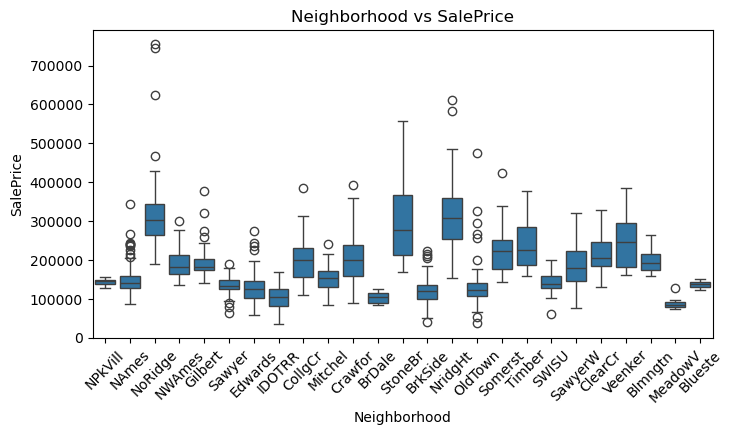

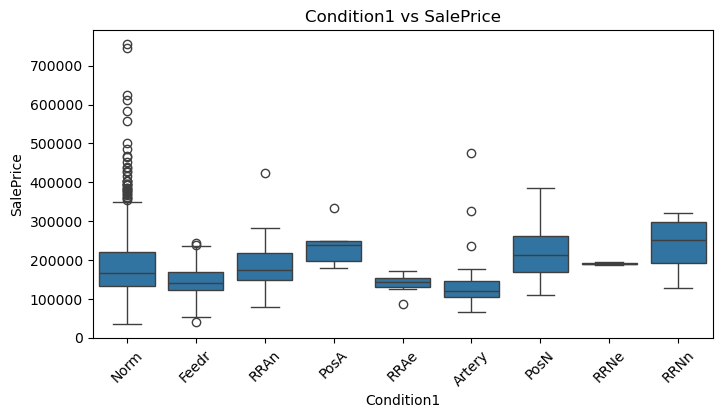

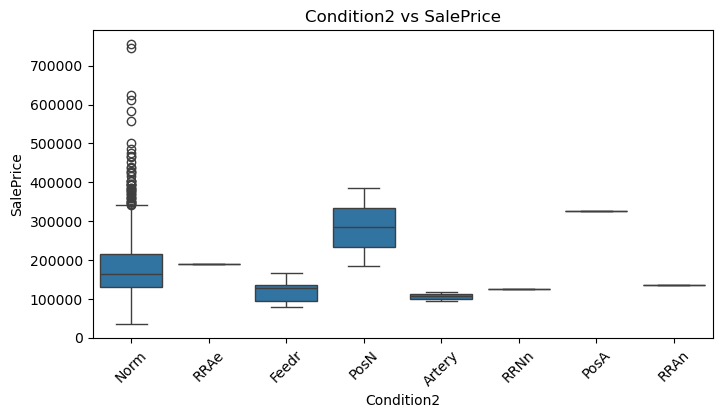

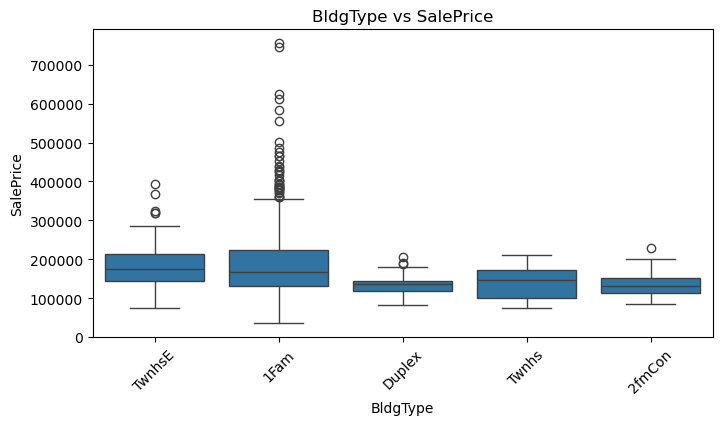

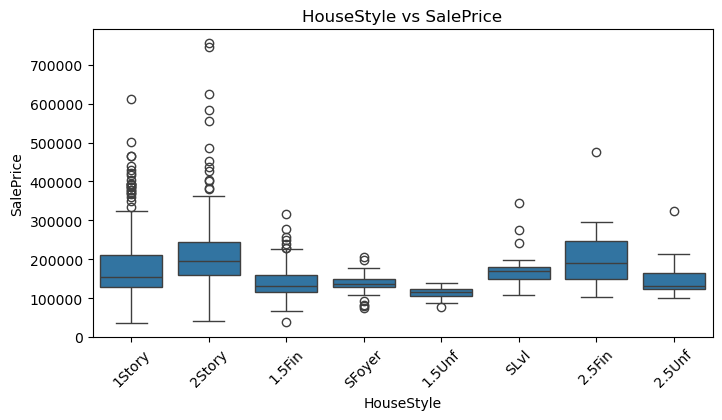

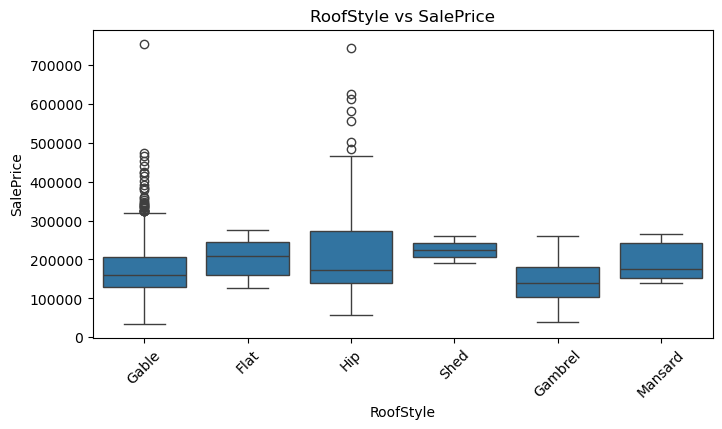

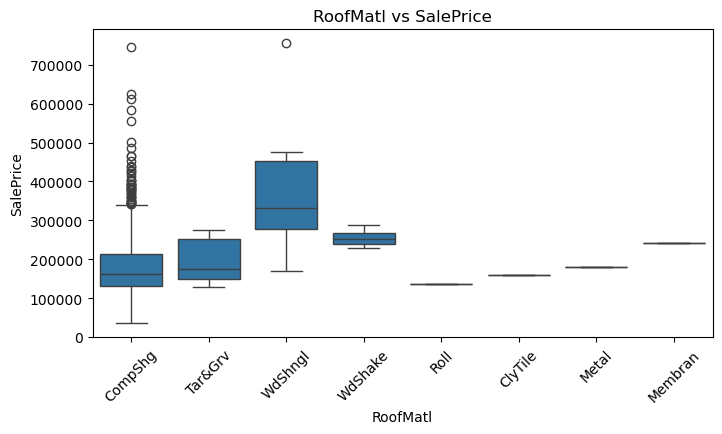

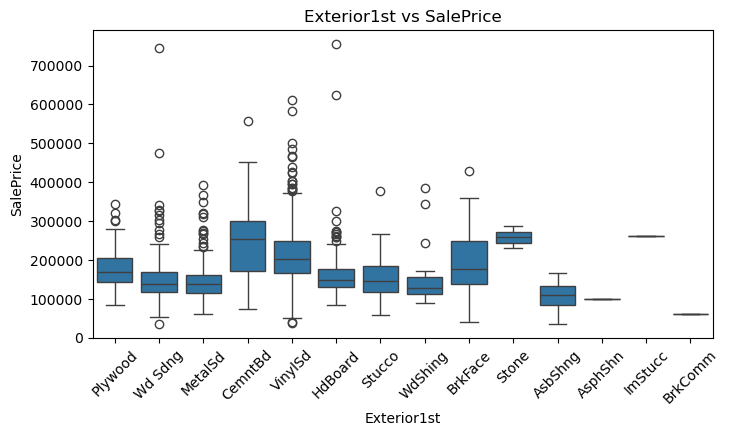

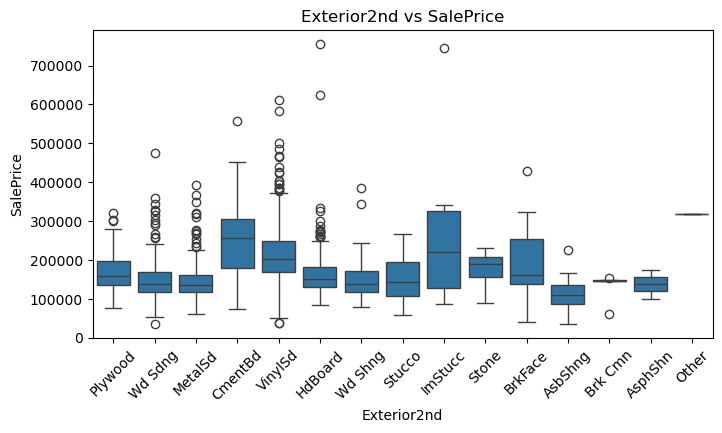

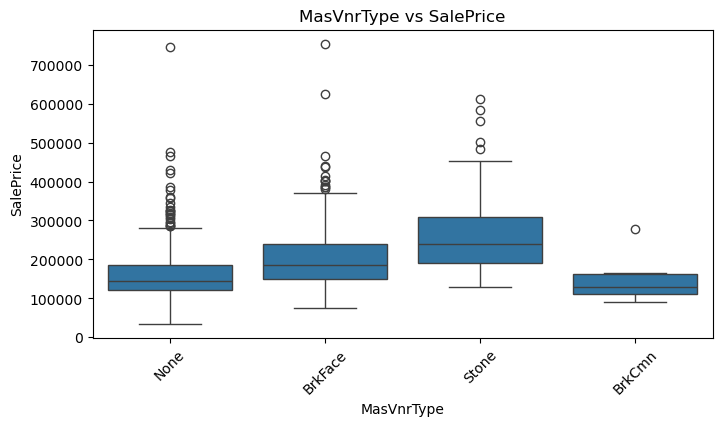

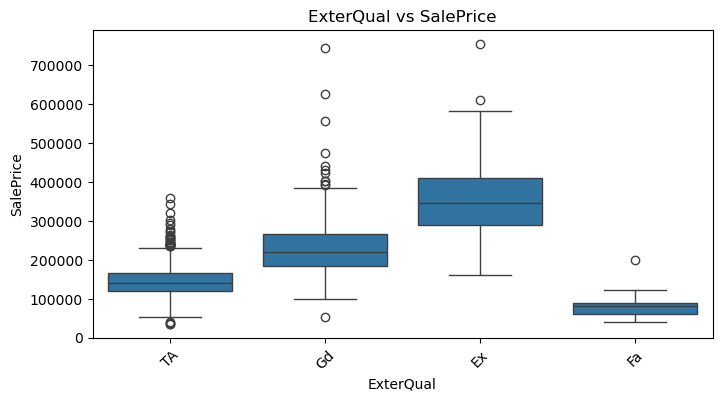

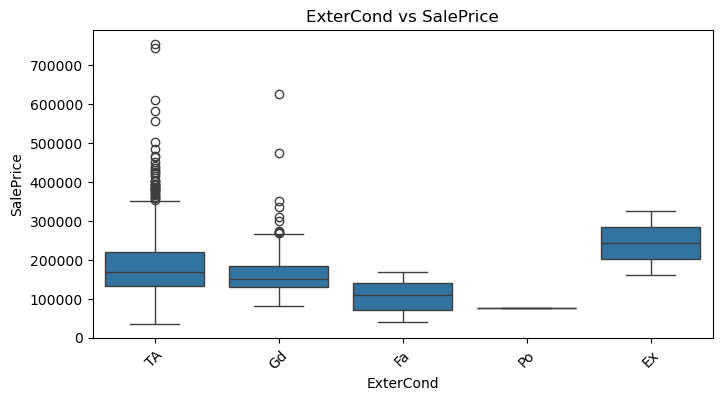

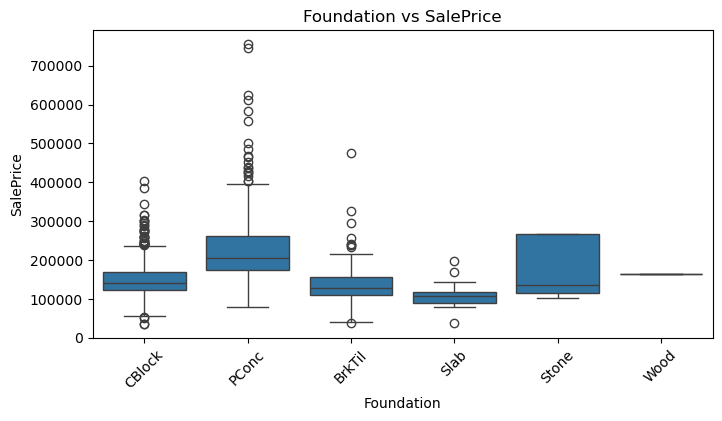

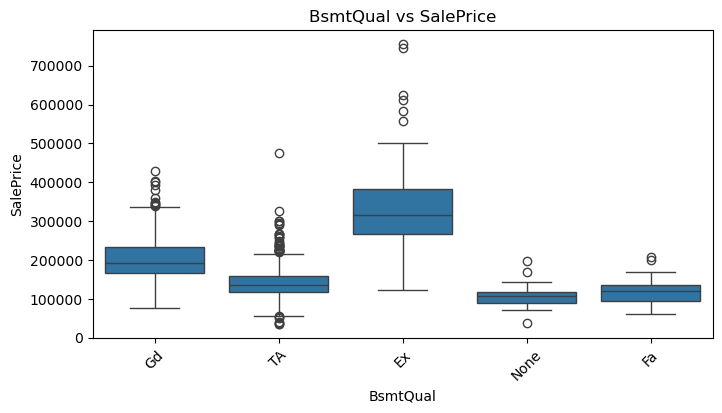

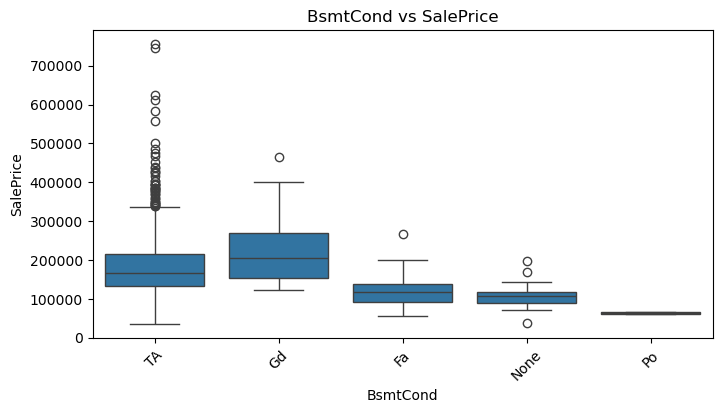

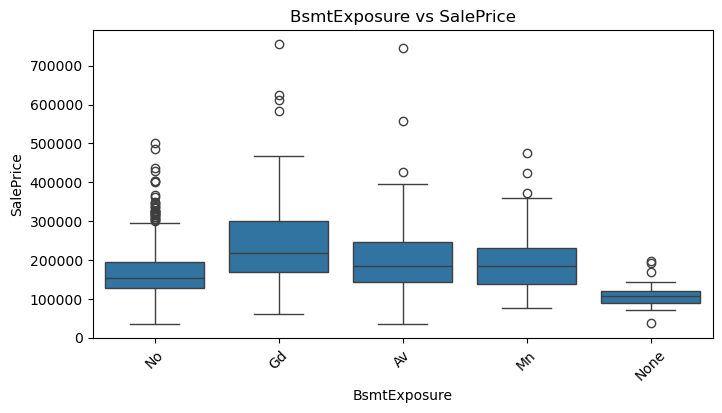

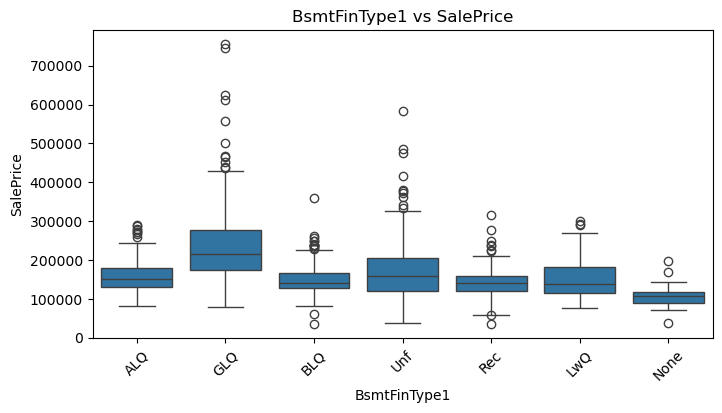

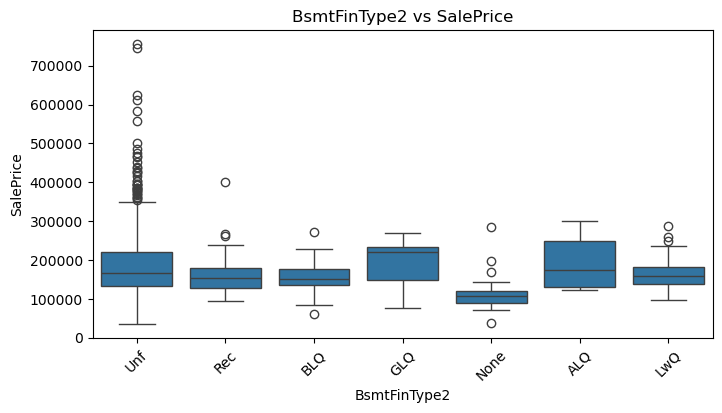

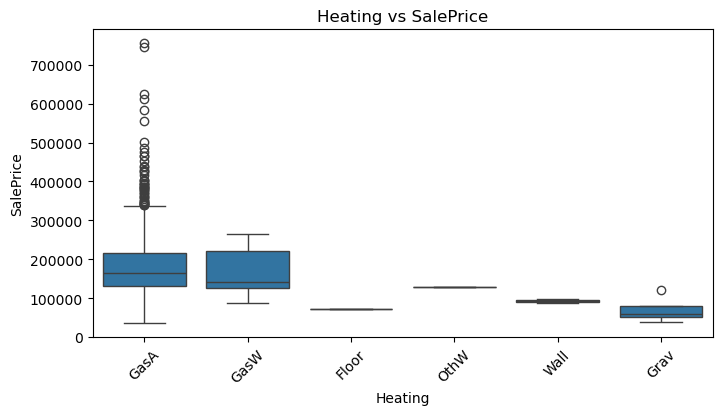

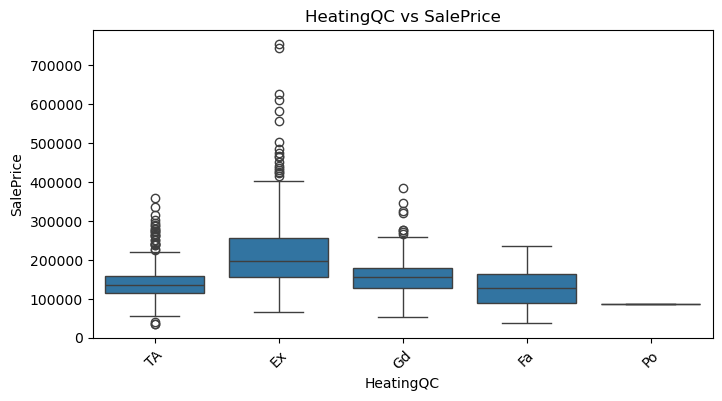

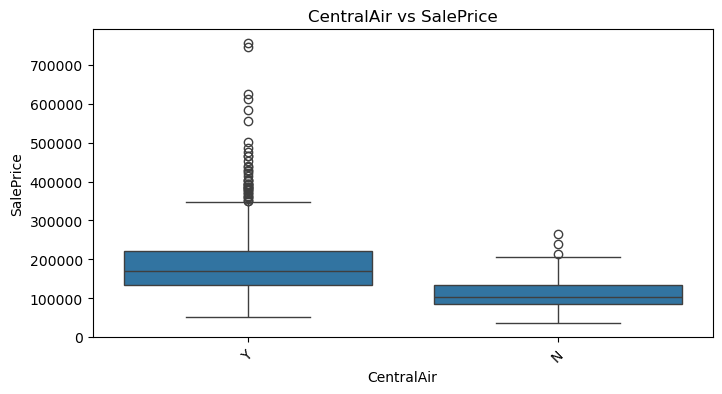

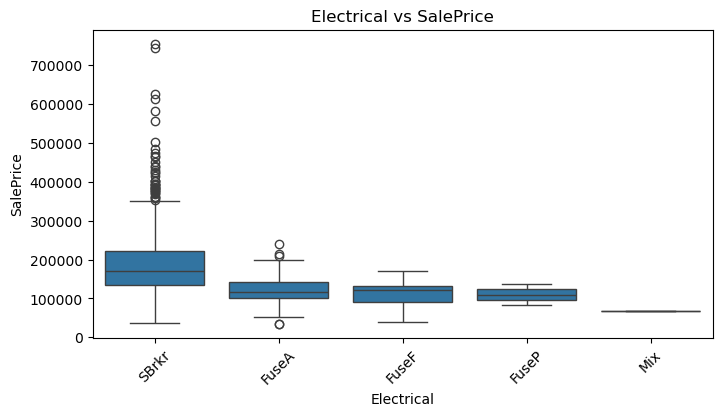

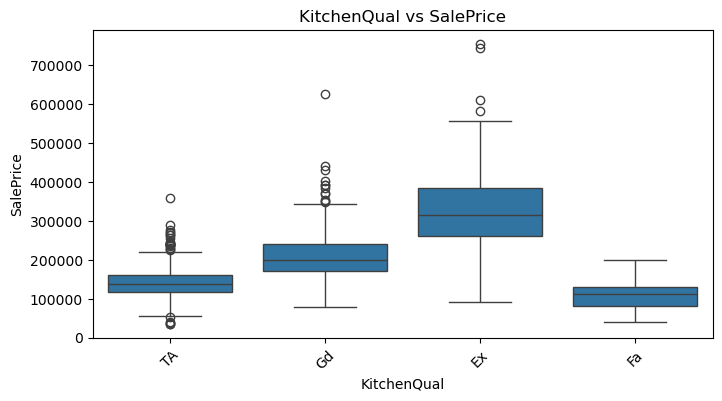

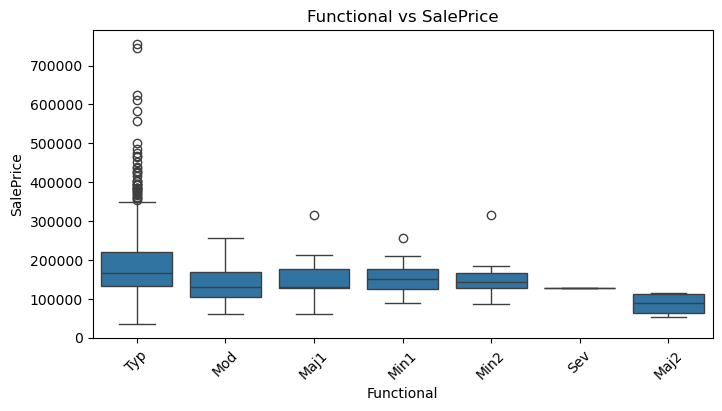

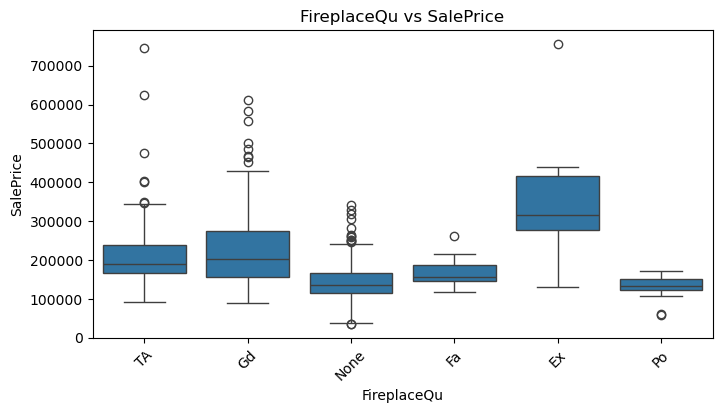

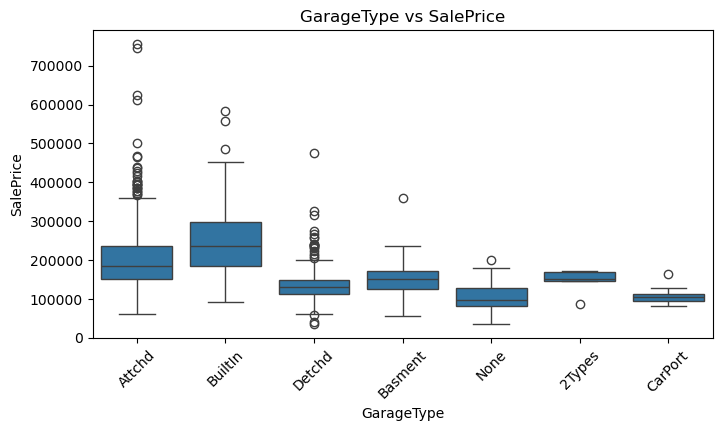

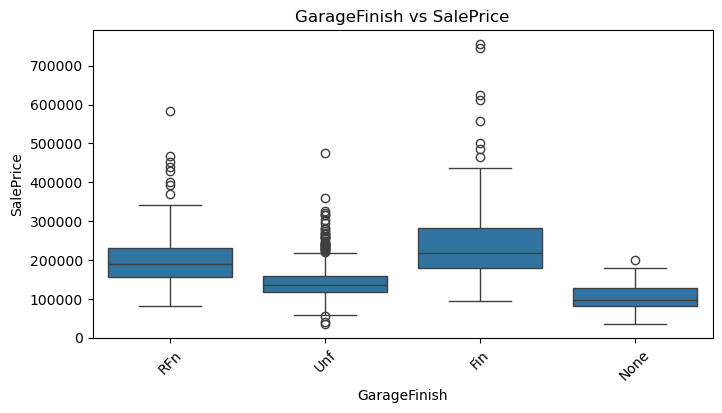

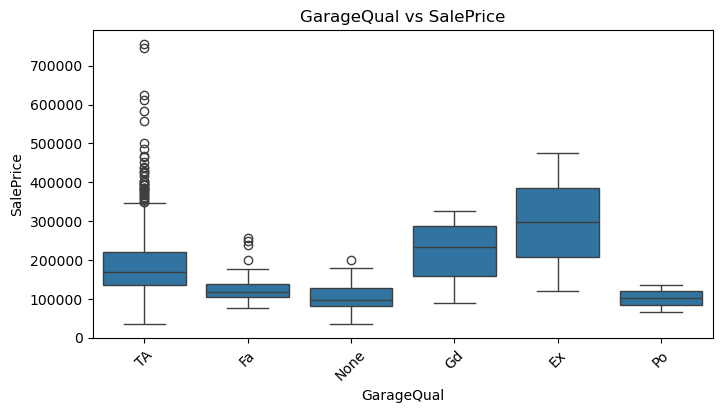

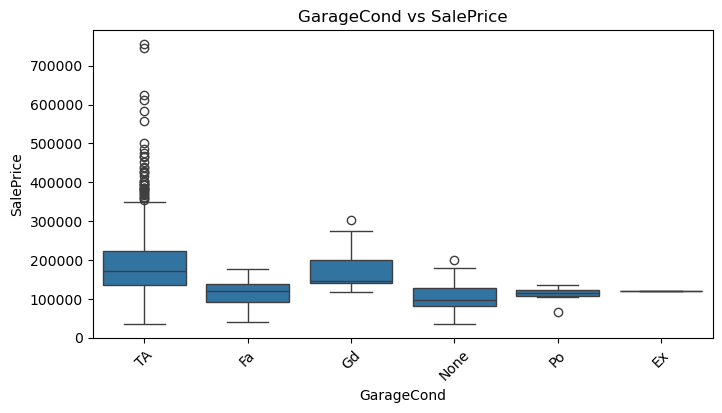

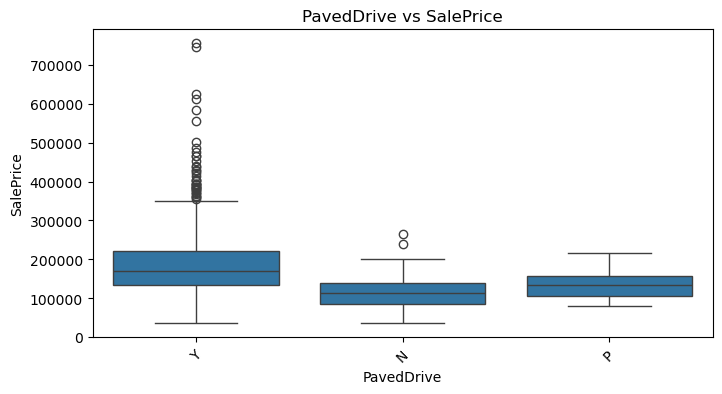

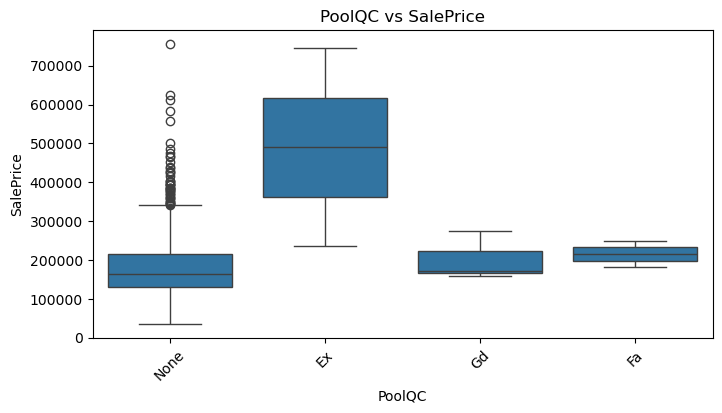

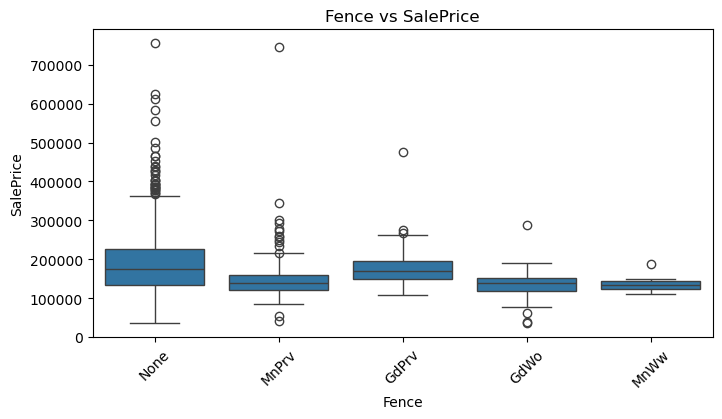

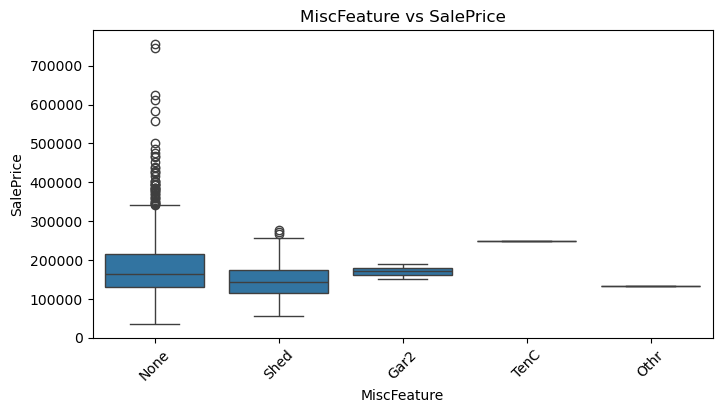

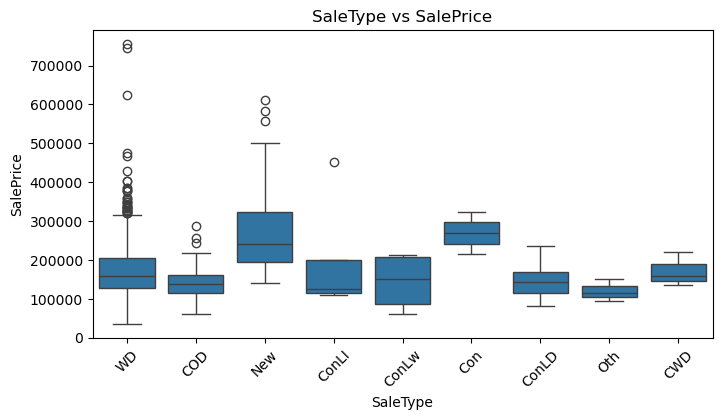

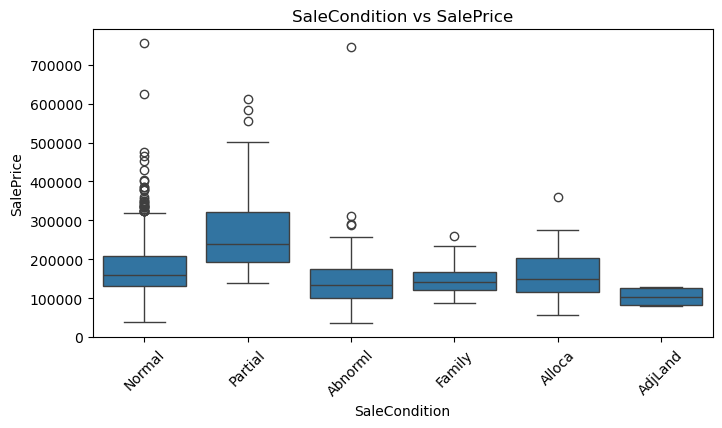

In [418]:
for columns in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=data[columns], y=data[target_variable])
    plt.title(f"{columns} vs {target_variable}")
    plt.show()

for columns in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[columns], y=data[target_variable])
    plt.xticks(rotation=45)
    plt.title(f"{columns} vs {target_variable}")
    plt.show()

In [419]:
numerical_columns_for_iqr = data.select_dtypes(include="float64").columns
Q1 = data[numerical_columns_for_iqr].quantile(0.25)
Q3 = data[numerical_columns_for_iqr].quantile(0.75)
IQR = Q3-Q1
IQR
#now im going to cap my data, cus remove will empty the dataset XD

MSSubClass          50.00
LotFrontage         19.25
LotArea           3894.00
OverallQual          2.00
OverallCond          1.00
YearBuilt           46.00
YearRemodAdd        38.00
MasVnrArea         160.00
BsmtFinSF1         714.50
BsmtFinSF2           0.00
BsmtUnfSF          600.00
TotalBsmtSF        492.50
1stFlrSF           500.00
2ndFlrSF           729.00
LowQualFinSF         0.00
GrLivArea          651.75
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         43.25
GarageCars           1.00
GarageArea         238.00
WoodDeckSF         171.00
OpenPorchSF         70.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        84625.00
dtype: float64

In [420]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(upper_limit)

MSSubClass          145.000
LotFrontage         108.125
LotArea           17356.500
OverallQual          10.000
OverallCond           7.500
YearBuilt          2069.000
YearRemodAdd       2061.000
MasVnrArea          400.000
BsmtFinSF1         1786.250
BsmtFinSF2            0.000
BsmtUnfSF          1716.000
TotalBsmtSF        2030.250
1stFlrSF           2142.000
2ndFlrSF           1822.500
LowQualFinSF          0.000
GrLivArea          2772.625
BsmtFullBath          2.500
BsmtHalfBath          0.000
FullBath              3.500
HalfBath              2.500
BedroomAbvGr          4.500
KitchenAbvGr          1.000
TotRmsAbvGrd         10.000
Fireplaces            2.500
GarageYrBlt        2065.875
GarageCars            3.500
GarageArea          933.000
WoodDeckSF          427.500
OpenPorchSF         175.000
EnclosedPorch         0.000
3SsnPorch             0.000
ScreenPorch           0.000
PoolArea              0.000
MiscVal               0.000
MoSold               12.500
YrSold             2

In [421]:
data["YearBuilt"] = data["YearBuilt"].clip(lower=lower_limit["YearBuilt"], upper=upper_limit["YearBuilt"])

In [422]:
data["YearRemodAdd"] = data["YearRemodAdd"].clip(lower=lower_limit["YearRemodAdd"], upper=upper_limit["YearRemodAdd"])

In [423]:
data["OverallQual"] = data["OverallQual"].clip(lower=lower_limit["OverallQual"], upper=upper_limit["OverallQual"])

In [424]:
data["OverallCond"] = data["OverallCond"].clip(lower=lower_limit["OverallCond"], upper=upper_limit["OverallCond"])

In [425]:
data["GarageYrBlt"] = data["GarageYrBlt"].clip(lower=lower_limit["GarageYrBlt"], upper=upper_limit["GarageYrBlt"])

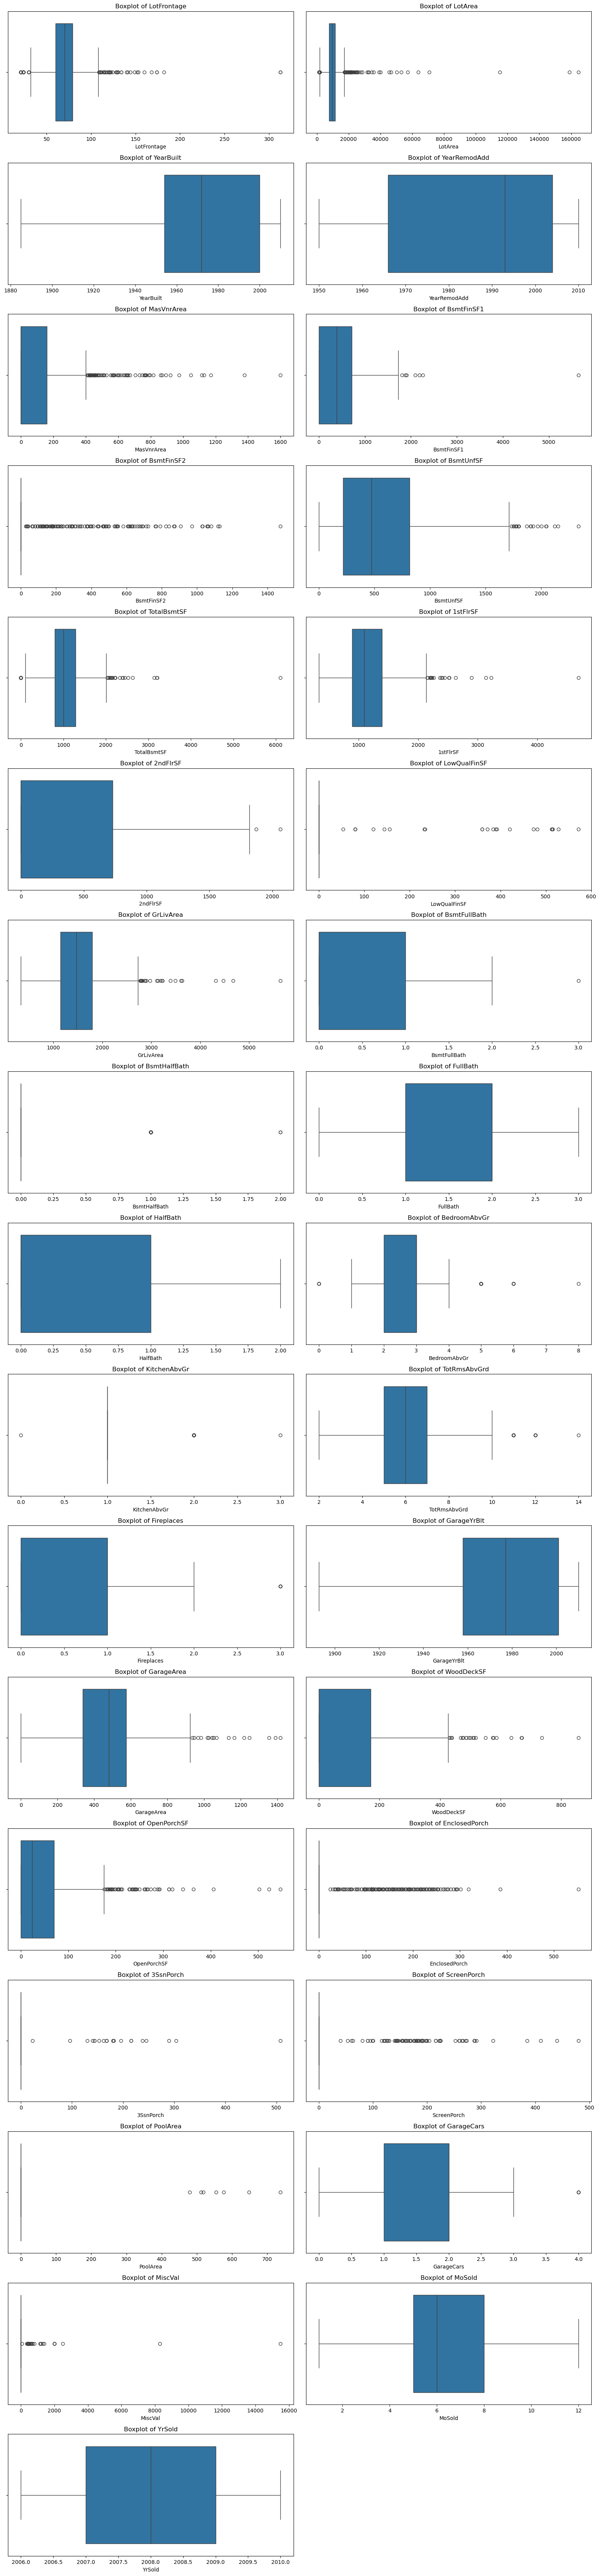

In [426]:
plt.figure(figsize=[16, (len(numerical_columns_for_split)*4)])
for i, columns in enumerate(numerical_columns_for_split):
    plt.subplot(len(numerical_columns_for_split), 2, i+1)
    sns.boxplot(x=data[columns])
    plt.title(f"Boxplot of {columns}")
plt.tight_layout()
plt.show()
#i feel multiple variables are areas and those have lots of outliers but 
#they are valid, since houses can have bigger areas way more than a 1bhk, vs a mansion

In [427]:
# Select only numeric columns
num_cols = data.select_dtypes(include=["number"]).columns

# Clip numeric data only
data[num_cols] = data[num_cols].clip(
    lower=data[num_cols].quantile(0.05),
    upper=data[num_cols].quantile(0.95),
    axis=1
)

In [428]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

skewness = data.skew(numeric_only=True)
right_skewed = skewness[skewness > 0.5].index.tolist()
left_skewed  = skewness[skewness < -0.5].index.tolist()

right_pt = PowerTransformer(method="yeo-johnson", standardize=True)
left_pt  = PowerTransformer(method="yeo-johnson", standardize=True)

preprocessor = ColumnTransformer(
    transformers=[
        ("right_skew", right_pt, right_skewed),
        ("left_skew", left_pt, left_skewed)
    ],
    remainder="passthrough"
)

pipeline = Pipeline(steps=[
    ("power_transform", preprocessor)
])

data_transformed = pipeline.fit_transform(data)
data_transformed = pd.DataFrame(
    data_transformed,
    columns=right_skewed + left_skewed + [col for col in data.columns if col not in (right_skewed+left_skewed)]
)

#i did not really use this, i realised i had to use data_transformed keyword from here on, but i kept using data😅

D:\Anaconda\anaconda3\Lib\site-packages\numpy\_core\_methods.py:197: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


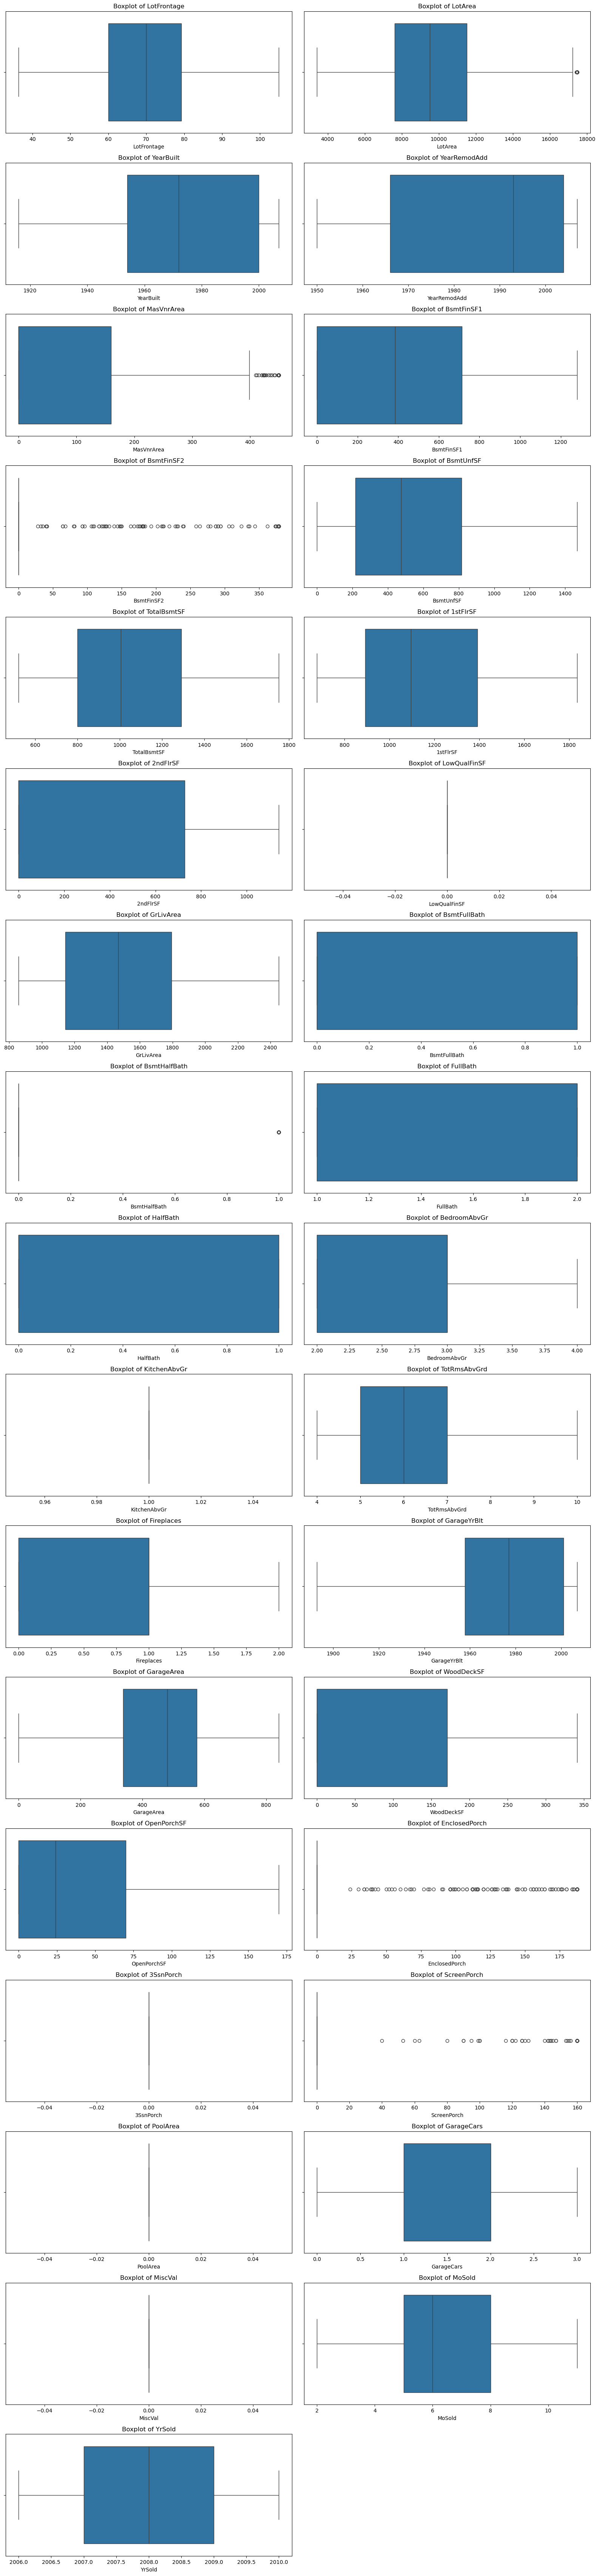

In [429]:
plt.figure(figsize=[16, (len(numerical_columns_for_split)*4)])
for i, columns in enumerate(numerical_columns_for_split):
    plt.subplot(len(numerical_columns_for_split), 2, i+1)
    sns.boxplot(x=data[columns])
    plt.title(f"Boxplot of {columns}")
plt.tight_layout()
plt.show()

In [430]:
LotArea_cap = np.percentile(data["LotArea"], 95)
data["LotArea"] = np.where(data["LotArea"] > LotArea_cap, LotArea_cap, data["LotArea"])

LotFrontage_cap = np.percentile(data["LotFrontage"], 95)
data["LotFrontage"] = np.where(data["LotFrontage"] > LotFrontage_cap, LotFrontage_cap, data["LotFrontage"])

cap_1stFlrSF = np.percentile(data["1stFlrSF"], 95)
data["1stFlrSF"] = np.where(data["1stFlrSF"] > cap_1stFlrSF, cap_1stFlrSF, data["1stFlrSF"])

GrLivArea_cap = np.percentile(data["GrLivArea"], 95)
data["GrLivArea"] = np.where(data["GrLivArea"] > GrLivArea_cap, GrLivArea_cap, data["GrLivArea"])

In [431]:
from scipy.stats import skew
data['SalePrice_no_skew'] = np.log1p(data['SalePrice'])

In [432]:
data.describe().T

count           mean           std           min  \
MSSubClass         1168.0      55.997432     39.712581     20.000000   
LotFrontage        1168.0      69.926070     16.413405     36.350000   
LotArea            1168.0    9723.759176   3432.754047   3420.700000   
OverallQual        1168.0       6.075342      1.229239      4.000000   
OverallCond        1168.0       5.578339      0.951966      4.000000   
YearBuilt          1168.0    1971.422089     28.901554   1916.000000   
YearRemodAdd       1168.0    1984.685788     20.703764   1950.000000   
MasVnrArea         1168.0      89.750899    138.019352      0.000000   
BsmtFinSF1         1168.0     431.230908    413.130404      0.000000   
BsmtFinSF2         1168.0      31.624187     95.982173      0.000000   
BsmtUnfSF          1168.0     558.496575    420.995550      0.000000   
TotalBsmtSF        1168.0    1057.994521    342.832758    521.750000   
1stFlrSF           1168.0    1157.344495    331.662370    677.050000   
2ndFlrSF           1168.0     339.197217    417.538811      0.000000   
LowQualFinSF       1168.0       0.000000      0.000000      0.000000   
GrLivArea          1168.0    1507.631849    449.117369    858.000000   
BsmtFullBath       1168.0       0.412671      0.492526      0.000000   
BsmtHalfBath       1168.0       0.053938      0.225993      0.000000   
FullBath           1168.0       1.545377      0.498150      1.000000   
HalfBath           1168.0       0.380137      0.485628      0.000000   
BedroomAbvGr       1168.0       2.897260      0.664739      2.000000   
KitchenAbvGr       1168.0       1.000000      0.000000      1.000000   
TotRmsAbvGrd       1168.0       6.529110      1.506060      4.000000   
Fireplaces         1168.0       0.613014      0.638042      0.000000   
GarageYrBlt        1168.0    1973.464897     30.970804   1892.875000   
GarageCars         1168.0       1.773116      0.737580      0.000000   
GarageArea         1168.0     471.459503    201.243431      0.000000   
WoodDeckSF         1168.0      91.090497    110.871123      0.000000   
OpenPorchSF        1168.0      42.684075     52.903790      0.000000   
EnclosedPorch      1168.0      20.266610     52.688539      0.000000   
3SsnPorch          1168.0       0.000000      0.000000      0.000000   
ScreenPorch        1168.0      11.794521     40.419318      0.000000   
PoolArea           1168.0       0.000000      0.000000      0.000000   
MiscVal            1168.0       0.000000      0.000000      0.000000   
MoSold             1168.0       6.342466      2.538650      2.000000   
YrSold             1168.0    2007.804795      1.329738   2006.000000   
SalePrice          1168.0  178101.174658  63959.807692  89675.000000   
SalePrice_no_skew  1168.0      12.028890      0.348016     11.403958   

                             25%            50%            75%            max  
MSSubClass             20.000000      50.000000      70.000000     160.000000  
LotFrontage            60.000000      70.000000      79.250000     105.000000  
LotArea              7621.500000    9522.500000   11515.500000   17455.532500  
OverallQual             5.000000       6.000000       7.000000       8.000000  
OverallCond             5.000000       5.000000       6.000000       7.500000  
YearBuilt            1954.000000    1972.000000    2000.000000    2007.000000  
YearRemodAdd         1966.000000    1993.000000    2004.000000    2007.000000  
MasVnrArea              0.000000       0.000000     160.000000     449.950000  
BsmtFinSF1              0.000000     385.500000     714.500000    1281.300000  
BsmtFinSF2              0.000000       0.000000       0.000000     378.950000  
BsmtUnfSF             216.000000     474.000000     816.000000    1468.000000  
TotalBsmtSF           799.000000    1005.500000    1291.500000    1752.650000  
1stFlrSF              892.000000    1096.500000    1392.000000    1834.380000  
2ndFlrSF                0.000000       0.000000     729.000000    1141.650000  
LowQualFinS

In [433]:
categorical_columns_for_split = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour","Utilities", "LotConfig", "LandSlope", 
                       "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", "OverallCond", 
                       "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual",
                       "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", 
                       "Functional", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond","PavedDrive", "PoolQC", "Fence", 
                       "MiscFeature", "SaleType", "SaleCondition"]

numerical_columns_for_split = ["LotFrontage", "LotArea", "YearBuilt", "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", 
                     "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", 
                     "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
                     "GarageYrBlt", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", 
                     "PoolArea", "GarageCars", "MiscVal", "MoSold", "YrSold"]

In [434]:
from sklearn.model_selection import train_test_split
X = data.drop(['SalePrice', 'SalePrice_no_skew'], axis=1)
y = data['SalePrice_no_skew']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

In [435]:
#here im making a pipeline to handle skewness correction scaling and encoding in 1 column transformer, 
#so that i can pack and apply eveything seamlessly to training csv
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, RobustScaler
from category_encoders import TargetEncoder

#skew correction and scaling 
numerical_pipeline = Pipeline(steps=[('power_transform', PowerTransformer(method='yeo-johnson')), ('scaler', RobustScaler())])

#target encoding 
categorical_pipeline = Pipeline(steps=[('target_encoder', TargetEncoder())])

#putting in a column transformer
preprocessor = ColumnTransformer(transformers=[('num', numerical_pipeline, numerical_columns_for_split), 
                                               ('cat', categorical_pipeline, categorical_columns_for_split)])

In [436]:
preprocessor.fit(X_train, y_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

D:\Anaconda\anaconda3\Lib\site-packages\numpy\_core\_methods.py:197: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\Anaconda\anaconda3\Lib\site-packages\numpy\_core\_methods.py:208: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


## __Feature Engineering__

In [437]:
data_reduced = data.drop(columns=['ScreenPorch', 'PoolArea', 'MoSold', 'YrSold'])
data.drop(columns=["LowQualFinSF"], axis=1, inplace=True)
print(data_reduced.shape)

(1168, 77)


In [438]:
data["TotalFlrSF"] = data["1stFlrSF"] + data["2ndFlrSF"]
data["TotalBathrooms"] = data["FullBath"] + 0.5*data["HalfBath"] + data["BsmtFullBath"] + 0.5*data["BsmtHalfBath"]
data["TotalPorchSF"] = data["OpenPorchSF"] + data["EnclosedPorch"] + data["3SsnPorch"] + data["ScreenPorch"]
data["HouseAge"] = data["YrSold"] - data["YearBuilt"]
data["RemodelAge"] = data["YrSold"] - data["YearRemodAdd"]

## __Linear Models__

In [439]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

X = data.drop(columns=["SalePrice", "SalePrice_no_skew"])
y = data["SalePrice_no_skew"]

linear_models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001)
}

results_linear = {}
for name, model in linear_models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    results_linear[name] = {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    }

In [440]:
pd.DataFrame(results_linear).T

RMSE        R2
LinearRegression  0.107279  0.911604
Ridge             0.108396  0.909752
Lasso             0.110971  0.905413

Here the R^2 is good at : 0.91

In [441]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))
kf = KFold(n_splits=5, shuffle=True, random_state=42)

model = LinearRegression()
cv_scores = cross_val_score(model, X_train_processed, y_train, cv=kf, scoring=rmse_scorer)
print("CV RMSE scores:", cv_scores)
print("Mean CV RMSE:", np.mean(cv_scores))

CV RMSE scores: [0.11719644 0.11997058 0.09398095 0.1166458  0.09225843]
Mean CV RMSE: 0.10801043719649968


Model performance is stable

## __Hyperparameter Tuning__

## __Tree Models__

In [442]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate

tree_models = {
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(max_iter=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
}

param_grids = {
    "RandomForest": {
        "n_estimators": [100, 200],
        "max_depth": [5, 7, None],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2],
        "max_features": ["sqrt"]
    },
    "GradientBoosting": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2],
        "subsample": [0.8, 1.0]
    },
    "HistGradientBoosting": {
        "max_iter": [100, 200],
        "max_depth": [3, 5],
        "min_samples_leaf": [20, 30],
        "learning_rate": [0.05, 0.1]
    },
    "XGBoost": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0]
    }
}

In [443]:
for name, model in tree_models.items():
    print(f"Running GridSearchCV for {name}...")
    grid = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring="r2", n_jobs=-1, verbose=1)
    grid.fit(X_train_processed, y_train)
    
    best_model = grid.best_estimator_
    y_train_pred = best_model.predict(X_train_processed)
    y_test_pred = best_model.predict(X_test_processed)
    
    results_tree[name] = {
        "Best Params": grid.best_params_,
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Train R2": r2_score(y_train, y_train_pred),
        "Test R2": r2_score(y_test, y_test_pred)
    }

Running GridSearchCV for RandomForest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Running GridSearchCV for GradientBoosting...
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Running GridSearchCV for HistGradientBoosting...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Running GridSearchCV for XGBoost...
Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [444]:
results_df = pd.DataFrame(results_tree).T
results_df

Best Params  \
RandomForest          {'max_depth': None, 'max_features': 'sqrt', 'm...   
GradientBoosting      {'learning_rate': 0.05, 'max_depth': 3, 'min_s...   
HistGradientBoosting  {'learning_rate': 0.1, 'max_depth': 3, 'max_it...   
XGBoost               {'colsample_bytree': 0.8, 'learning_rate': 0.0...   

                     Train RMSE Test RMSE  Train R2   Test R2  
RandomForest           0.043401  0.119776  0.984123  0.889808  
GradientBoosting       0.061898  0.108005  0.967705  0.910402  
HistGradientBoosting   0.061138  0.111675  0.968494  0.904209  
XGBoost                0.028506  0.108836  0.993151  0.909018

## Making a Joblib file

In [445]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
import joblib

gb_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=0.8,
    random_state=42
)

final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', gb_model)
])

In [446]:
print(X_train.columns)
print(numerical_columns_for_split)
print(categorical_columns_for_split)


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [447]:
final_pipeline.fit(X_train, y_train) 

D:\Anaconda\anaconda3\Lib\site-packages\numpy\_core\_methods.py:197: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\Anaconda\anaconda3\Lib\site-packages\numpy\_core\_methods.py:208: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('power_transform',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath',...
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'OverallQual', 'OverallCond',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating', ...])])),
                ('regressor',
                 GradientBoostingRegressor(learning_rate=0.05, n_estimators=200,
                                           random_state=42, subsample=0.8))])

In [448]:
import joblib
joblib.dump(final_pipeline, "gradientboost_pipeline.joblib")

['gradientboost_pipeline.joblib']